## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")


## Loading the dataset

In [ ]:
df = pd.read_csv('Train.csv.csv')

In [ ]:
df_test = pd.read_csv('Test.csv.csv')

## Data Overview

- Observations
- Sanity checks

#### View the first and last 5 rows of the dataset.

In [ ]:
# View the first 5 rows of the training data
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


In [ ]:
# View the last 5 rows of the training data
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071,-1.088,-0.796,-3.012,-2.288,2.807,0.481,0.105,-0.587,-2.899,8.868,1.717,1.358,-1.777,0.710,4.945,-3.100,-1.199,-1.085,-0.365,3.131,-3.948,-3.578,-8.139,-1.937,-1.328,-0.403,-1.735,9.996,6.955,-3.938,-8.274,5.745,0.589,-0.650,-3.043,2.216,0.609,0.178,2.928,1
19996,2.890,2.483,5.644,0.937,-1.381,0.412,-1.593,-5.762,2.150,0.272,-2.095,-1.526,0.072,-3.540,-2.762,-10.632,-0.495,1.720,3.872,-1.210,-8.222,2.121,-5.492,1.452,1.450,3.685,1.077,-0.384,-0.839,-0.748,-1.089,-4.159,1.181,-0.742,5.369,-0.693,-1.669,3.660,0.820,-1.987,0
19997,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
19998,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
19999,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0


In [ ]:
# View the first 5 rows of the test data
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


In [ ]:
# View the last 5 rows of the test data
df_test.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
4995,-5.120,1.635,1.251,4.036,3.291,-2.932,-1.329,1.754,-2.985,1.249,-6.878,3.715,-2.512,-1.395,-2.554,-2.197,4.772,2.403,3.792,0.487,-2.028,1.778,3.668,11.375,-1.977,2.252,-7.319,1.907,-3.734,-0.012,2.120,9.979,0.063,0.217,3.036,2.109,-0.557,1.939,0.513,-2.694,0
4996,-5.172,1.172,1.579,1.220,2.530,-0.669,-2.618,-2.001,0.634,-0.579,-3.671,0.460,3.321,-1.075,-7.113,-4.356,-0.001,3.698,-0.846,-0.222,-3.645,0.736,0.926,3.278,-2.277,4.458,-4.543,-1.348,-1.779,0.352,-0.214,4.424,2.604,-2.152,0.917,2.157,0.467,0.470,2.197,-2.377,0
4997,-1.114,-0.404,-1.765,-5.879,3.572,3.711,-2.483,-0.308,-0.922,-2.999,-0.112,-1.977,-1.623,-0.945,-2.735,-0.813,0.610,8.149,-9.199,-3.872,-0.296,1.468,2.884,2.792,-1.136,1.198,-4.342,-2.869,4.124,4.197,3.471,3.792,7.482,-10.061,-0.387,1.849,1.818,-1.246,-1.261,7.475,0
4998,-1.703,0.615,6.221,-0.104,0.956,-3.279,-1.634,-0.104,1.388,-1.066,-7.970,2.262,3.134,-0.486,-3.498,-4.562,3.136,2.536,-0.792,4.398,-4.073,-0.038,-2.371,-1.542,2.908,3.215,-0.169,-1.541,-4.724,-5.525,1.668,-4.100,-5.949,0.550,-1.574,6.824,2.139,-4.036,3.436,0.579,0
4999,-0.604,0.960,-0.721,8.230,-1.816,-2.276,-2.575,-1.041,4.130,-2.731,-3.292,-1.674,0.465,-1.646,-5.263,-7.988,6.480,0.226,4.963,6.752,-6.306,3.271,1.897,3.271,-0.637,-0.925,-6.759,2.990,-0.814,3.499,-8.435,2.370,-1.062,0.791,4.952,-7.441,-0.070,-0.918,-2.291,-5.363,0


* The 'Target' column has two values and they are binary '0' and '1'.
* There are 40 Predictors and it goes from V1 to V40.





#### Shape of the Dataset

In [ ]:
# View the shape of the training data
df.shape

(20000, 41)

In [ ]:
# View the shape of the test data
df_test.shape

(5000, 41)

There are 20000 records in the training data and 5000 records in the test data with 41 columns.

#### Datatypes of the Columns of the Dataset

In [ ]:
# check the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

*   There are 41 columns and all the columns are of type numeric. Hence there wont be a need to encode the values and create dummies as there are no categorical variables.
*   There are two columns V1 and V2 which has missing values and these missing values need to be imputed.



#### Missing value check

In [ ]:
# let's check for missing values in the training data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

V1       0.090
V2       0.090
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

There are about 1% of data missing in the V1 and V2 columns of the training data.

In [ ]:
# let's check for missing values in the test data
round(df_test.isnull().sum() / df_test.isnull().count() * 100, 2)

V1       0.100
V2       0.120
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

There are 10% data missing in V1 column and 12% data missing in the V2 column of the test data.

#### Duplicate values check

In [ ]:
# Check for duplicate values in training data
df.duplicated().sum()

0

In [ ]:
# Check for duplicate values in test data
df_test.duplicated().sum()

0

There are no duplicate values in both training and test dataset.

#### Statistical Summary of the variables

In [ ]:
# check the statistical summary of numerical variables in the training dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


In [ ]:
# check the statistical summary of numerical variables in the test dataset
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,4995.000,-0.278,3.466,-12.382,-2.744,-0.765,1.831,13.504
V2,4994.000,0.398,3.140,-10.716,-1.649,0.427,2.444,14.079
V3,5000.000,2.552,3.327,-9.238,0.315,2.260,4.587,15.315
V4,5000.000,-0.049,3.414,-14.682,-2.293,-0.146,2.166,12.140
V5,5000.000,-0.080,2.111,-7.712,-1.615,-0.132,1.341,7.673
V6,5000.000,-1.042,2.005,-8.924,-2.369,-1.049,0.308,5.068
V7,5000.000,-0.908,1.769,-8.124,-2.054,-0.940,0.212,7.616
V8,5000.000,-0.575,3.332,-12.253,-2.642,-0.358,1.713,10.415
V9,5000.000,0.030,2.174,-6.785,-1.456,-0.080,1.450,8.851
V10,5000.000,0.019,2.145,-8.171,-1.353,0.166,1.511,6.599


The 'Target' variable has the value '0' till 75th percentile in both the training and test dataset. The last 25% has the value '1'. It infers that the classification of data is Imbalanced and it needs to be addressed.

#### Making Copies of the original dataset to perform data manipulations

In [ ]:
# create a copy of the training data
data = df.copy()

In [ ]:
# create a copy of the test data
data_test = df_test.copy()

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

**Lets define the following functions to carry out the EDA.**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

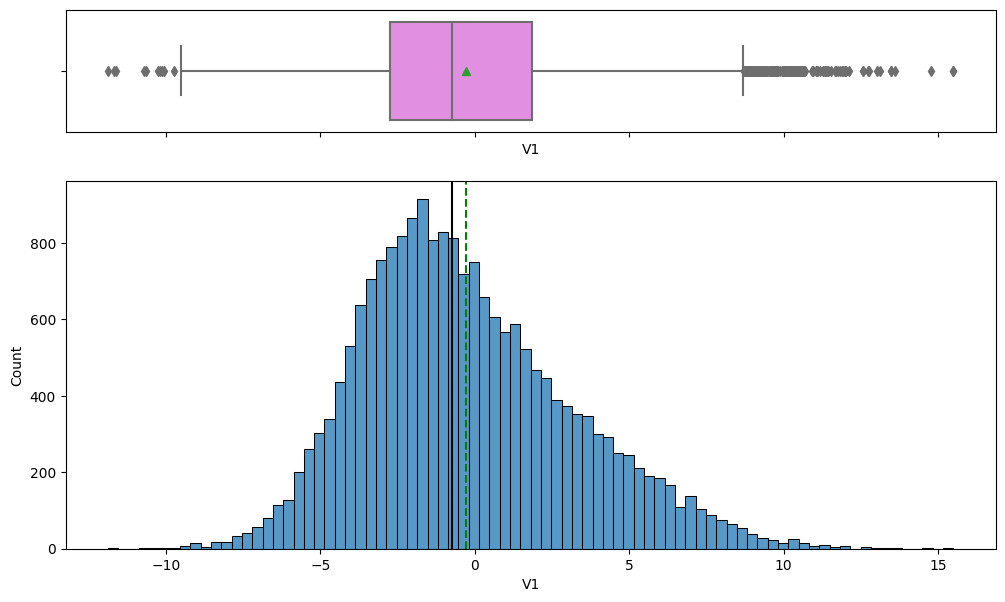

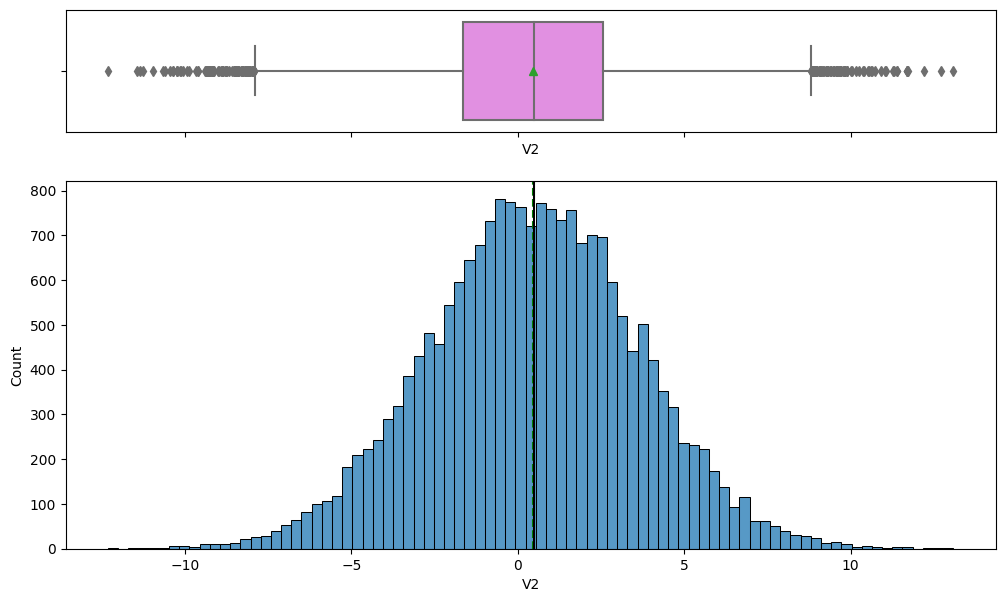

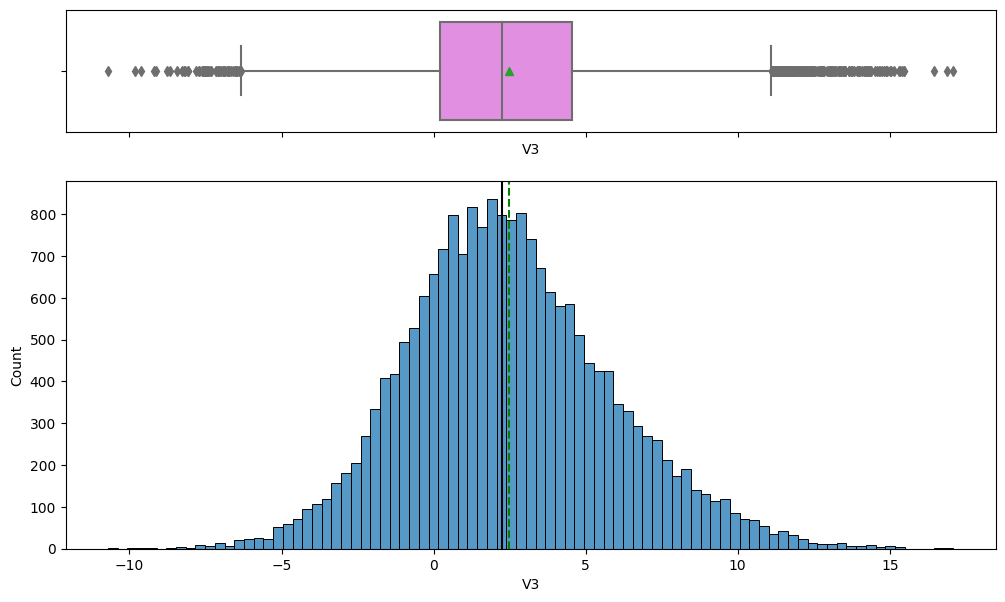

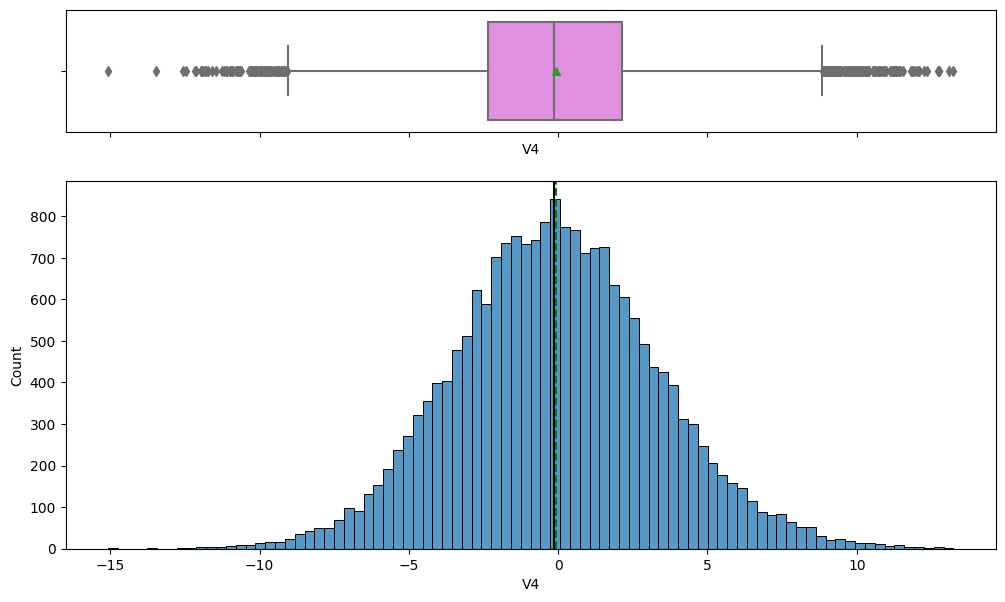

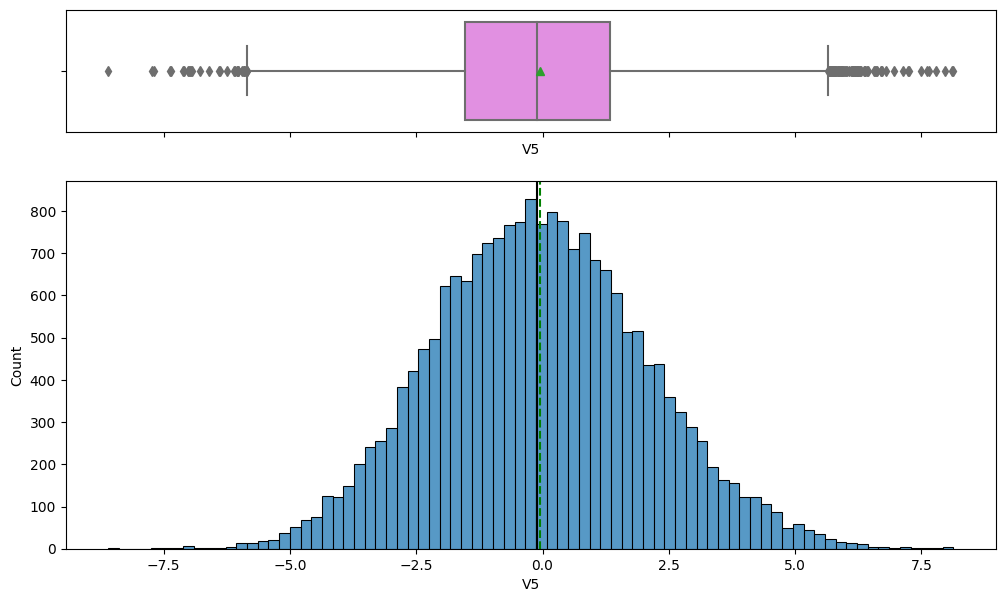

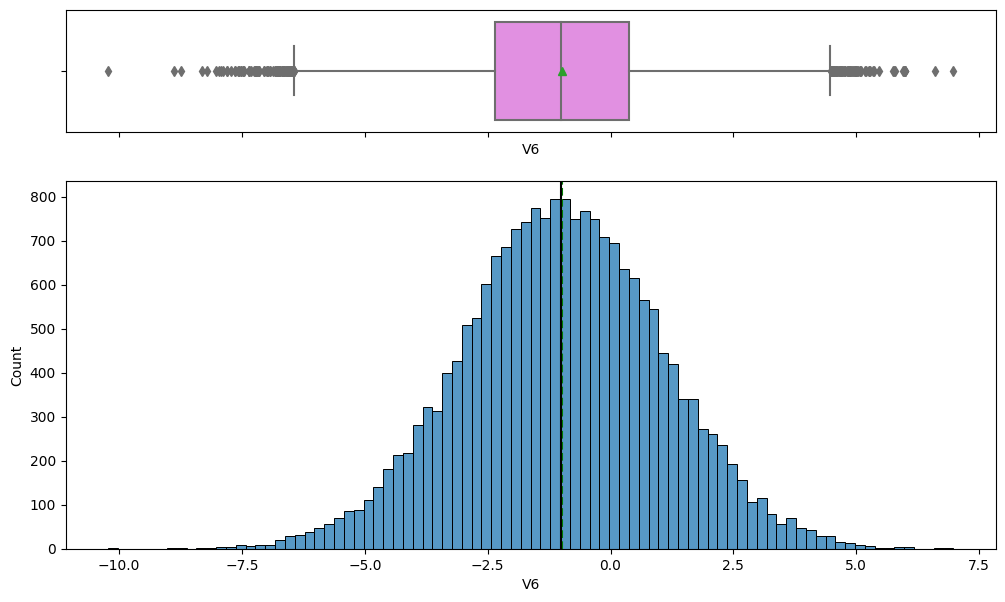

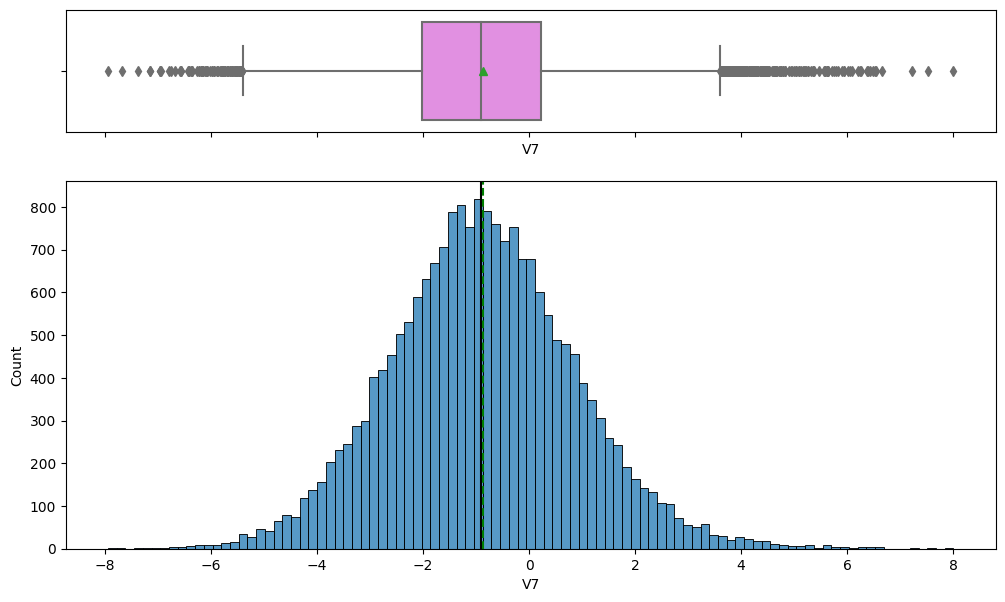

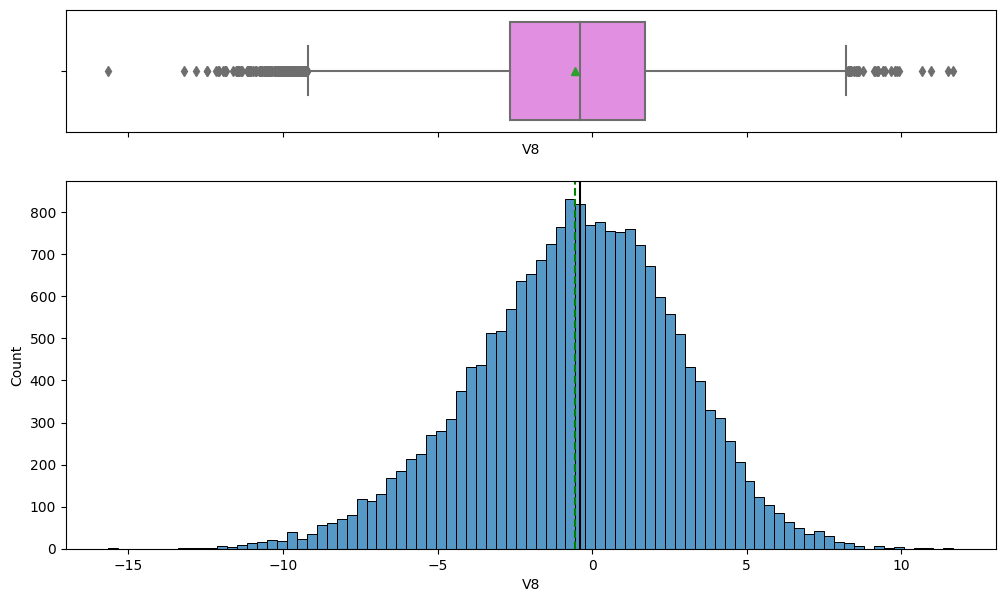

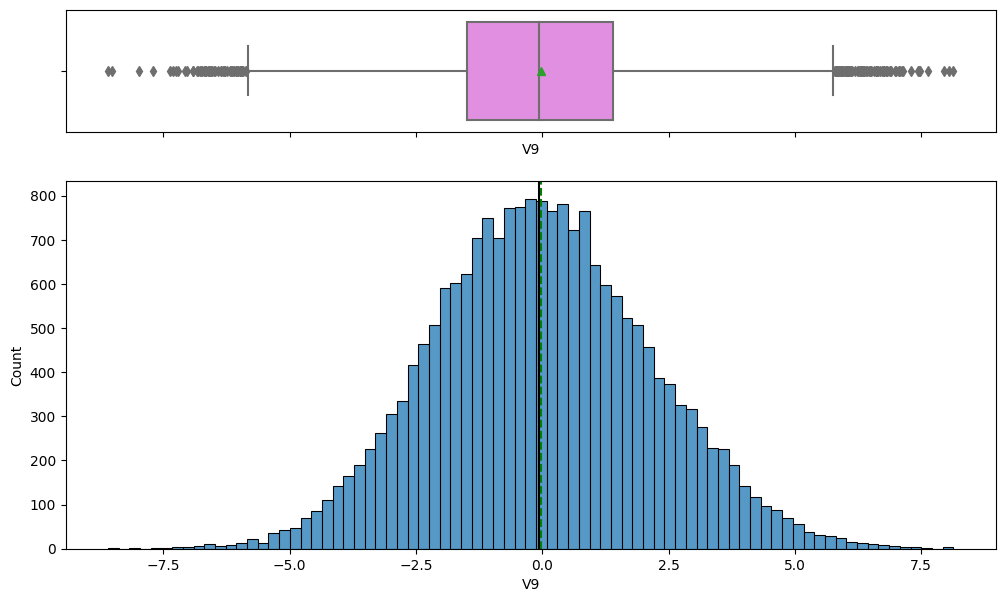

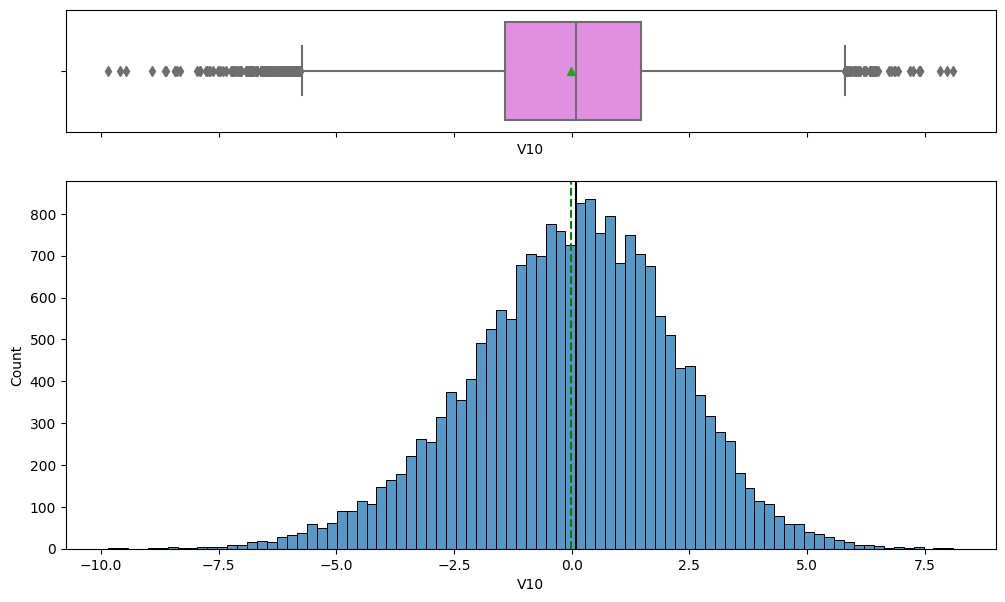

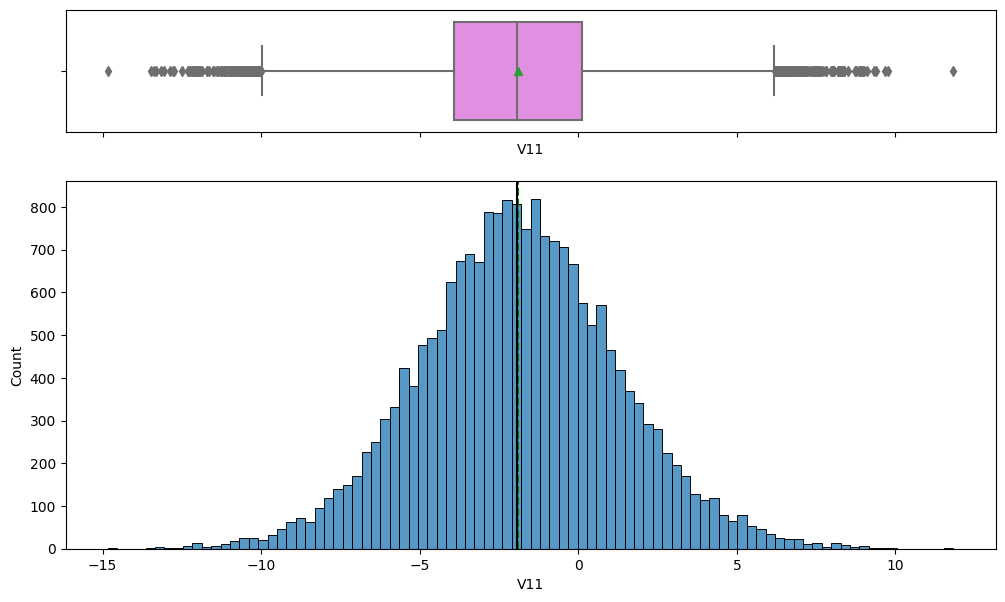

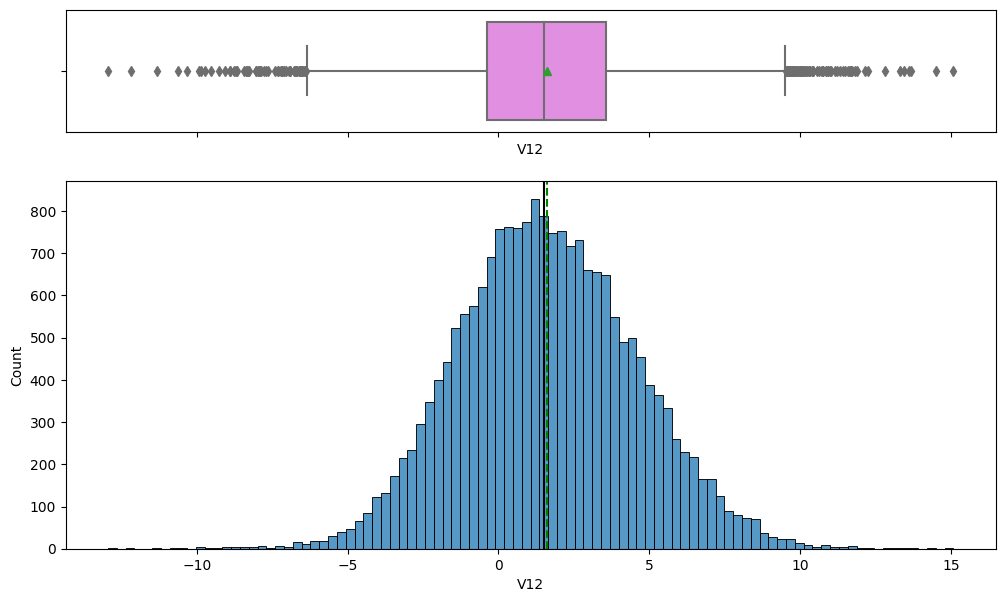

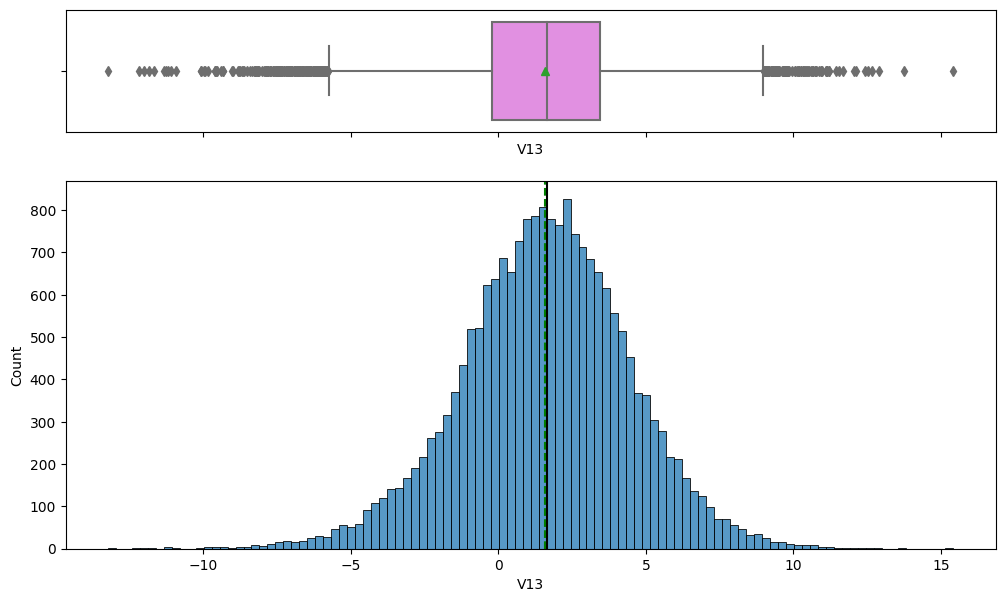

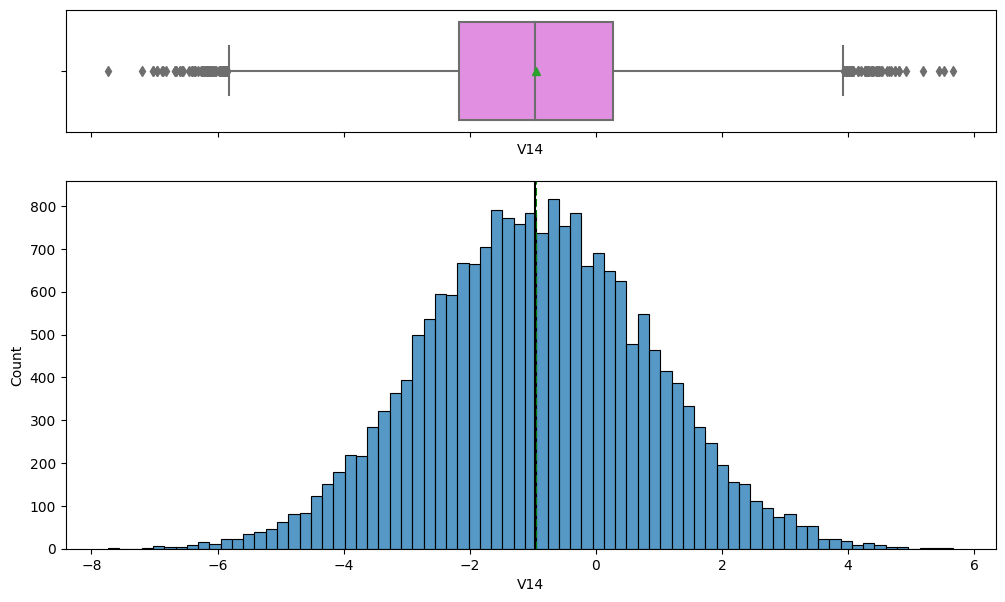

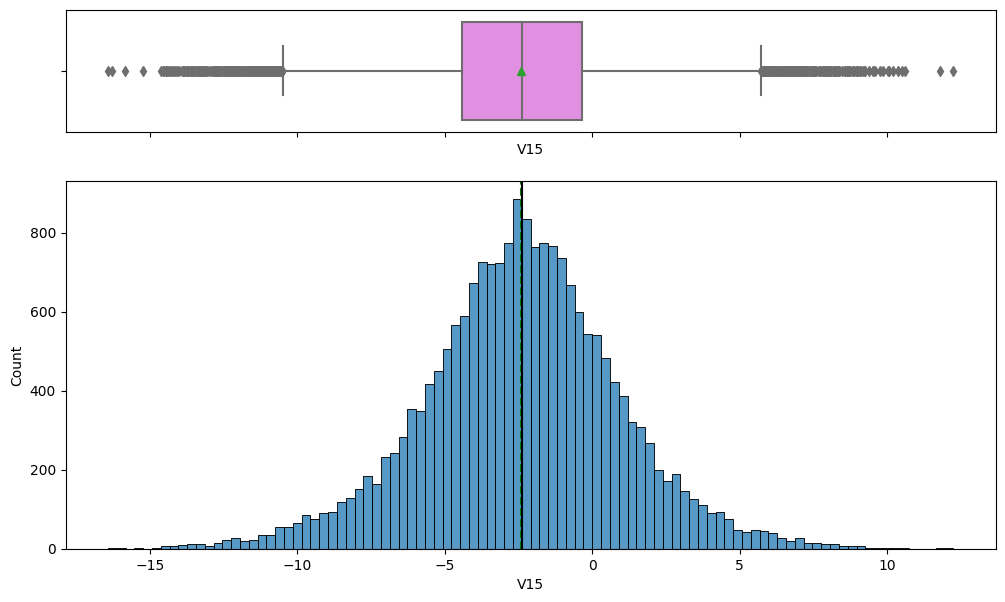

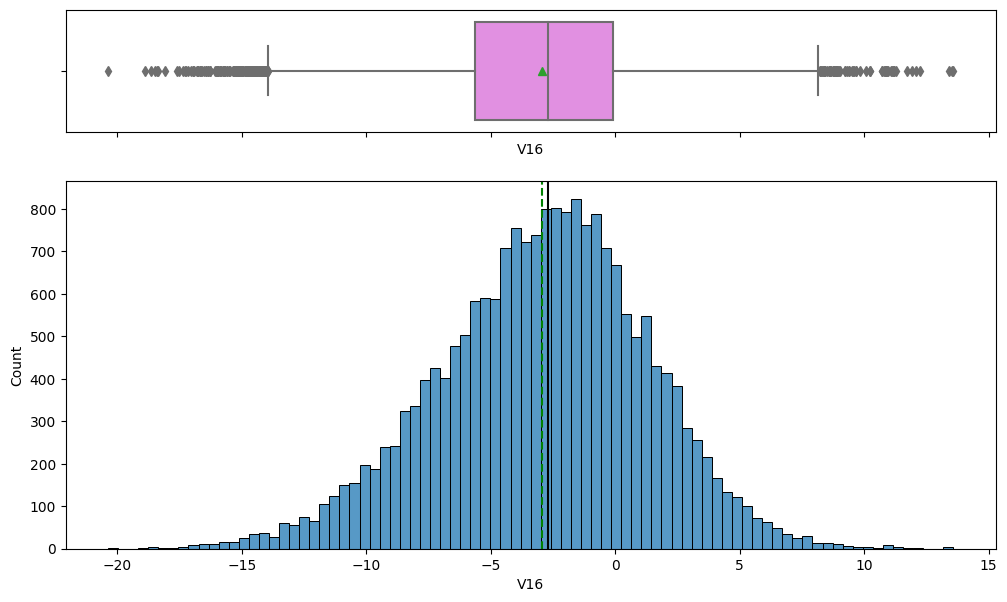

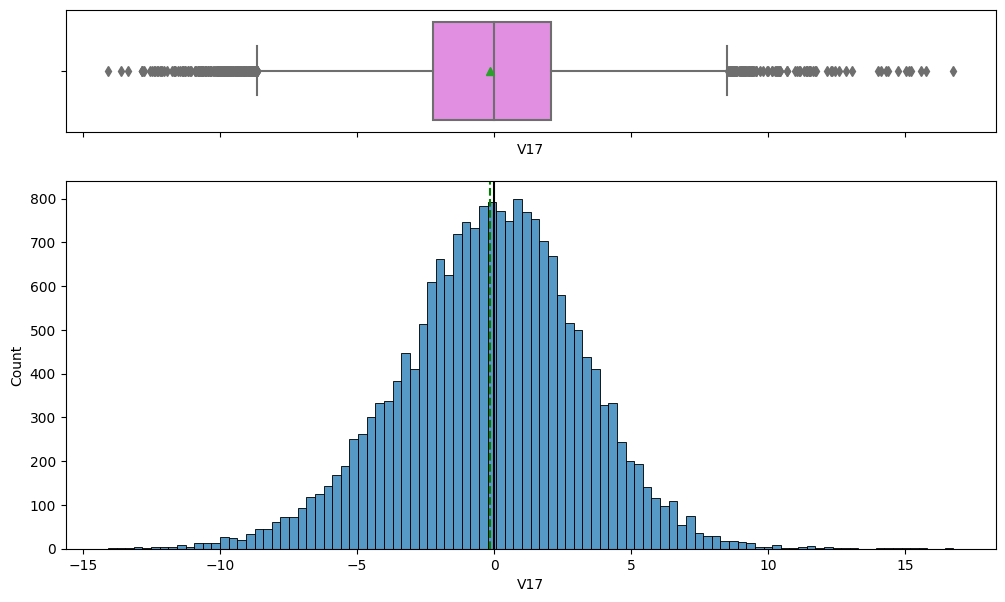

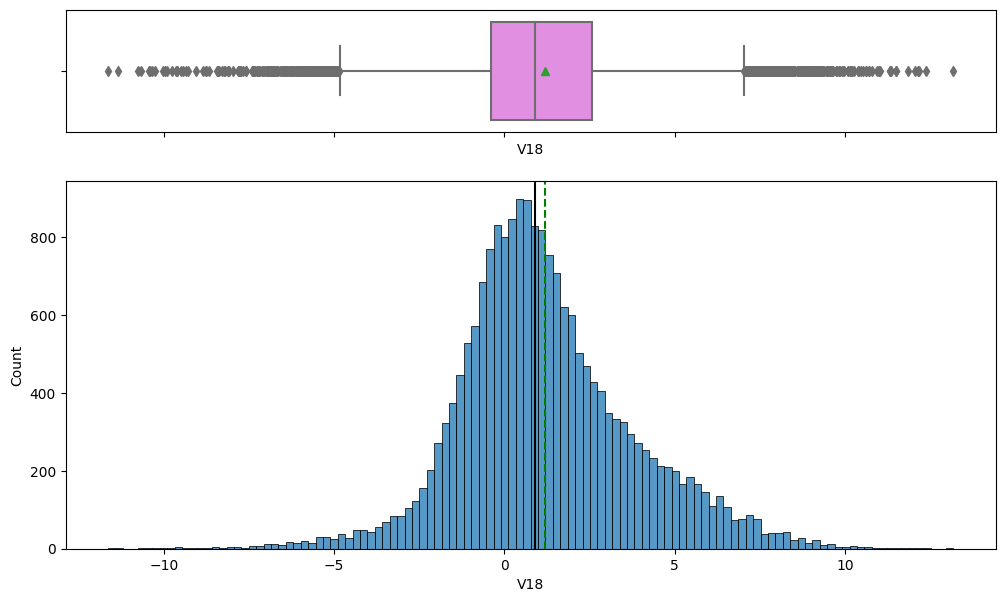

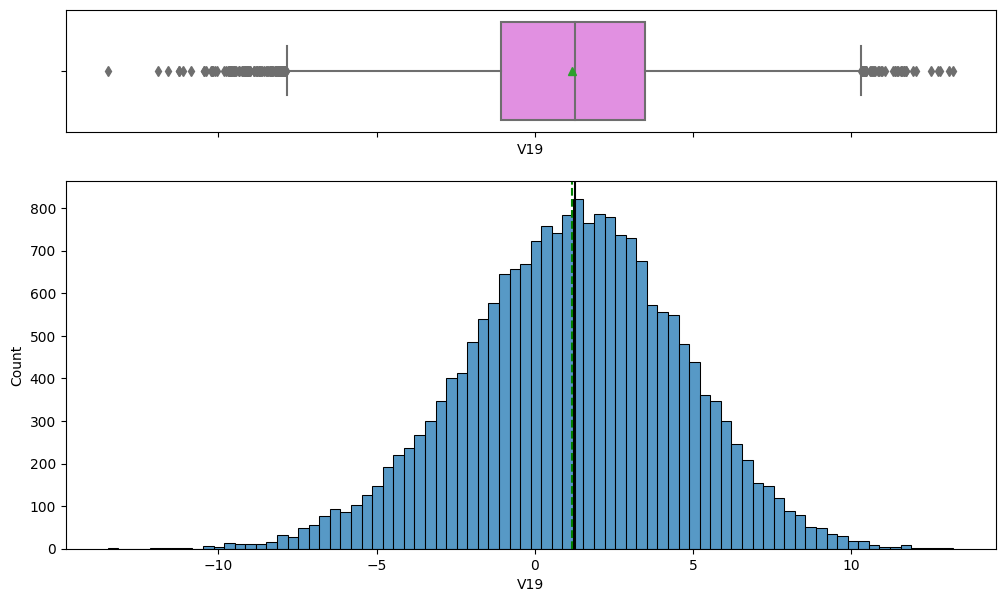

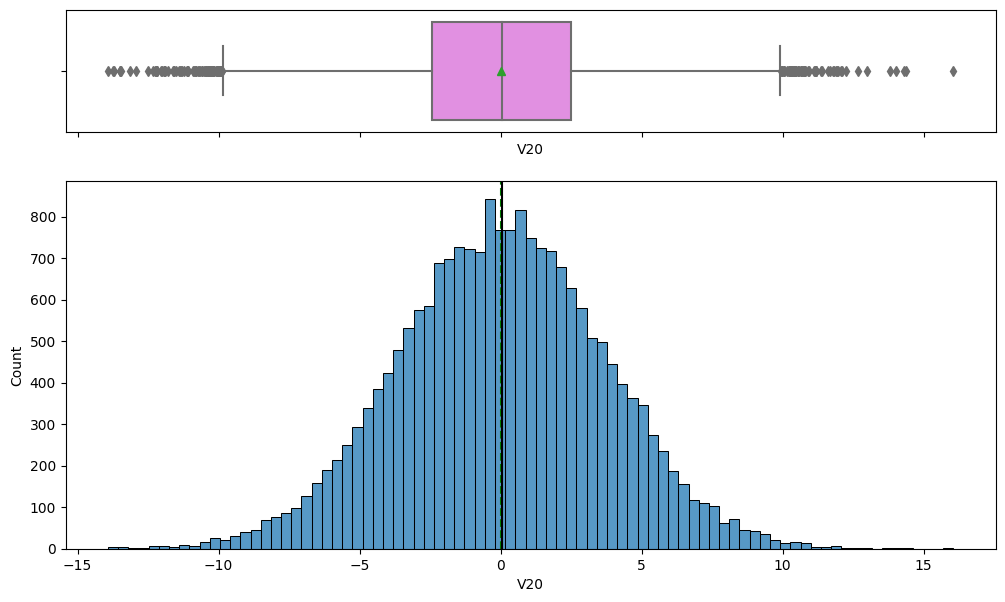

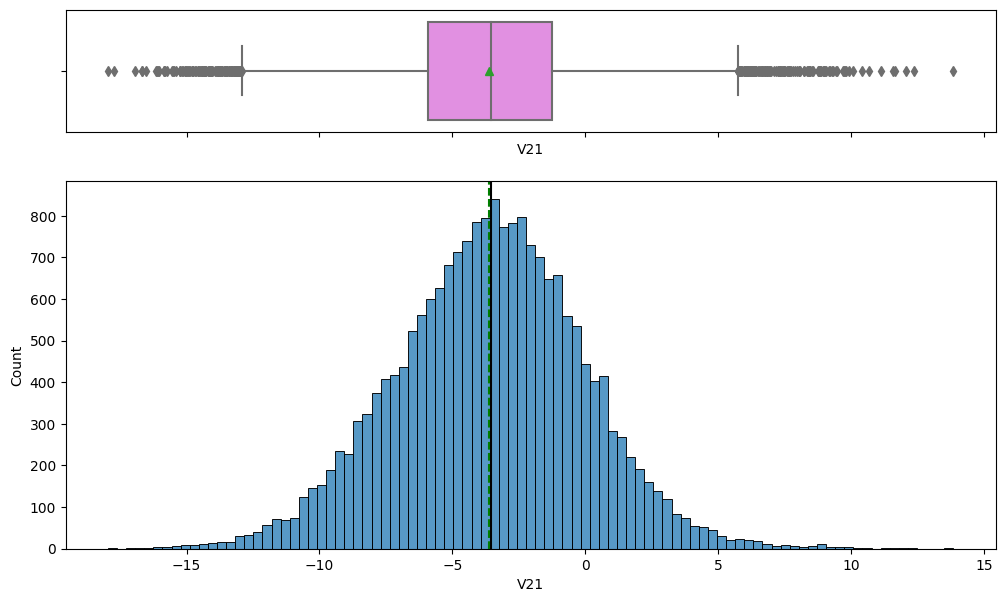

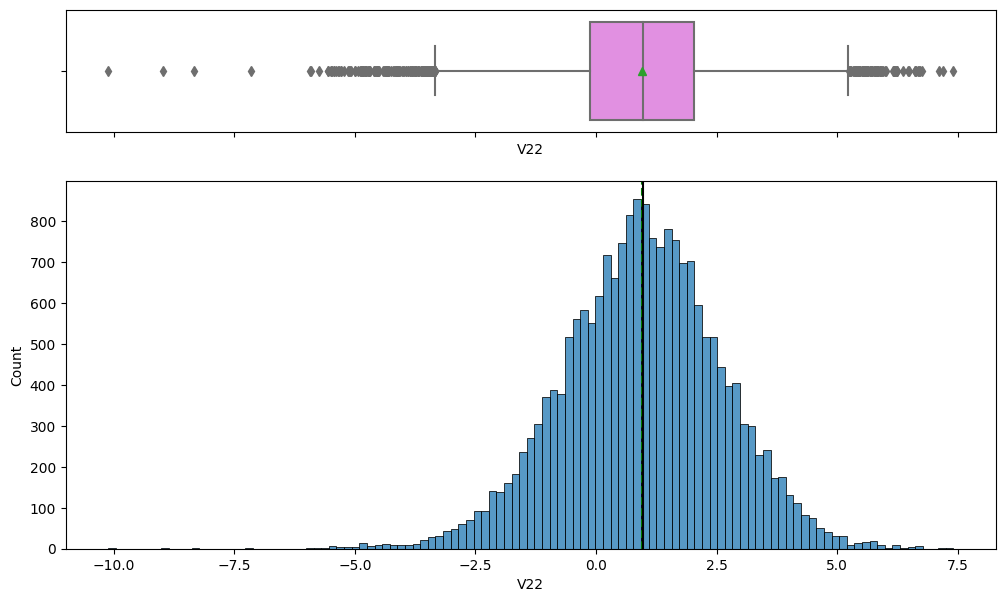

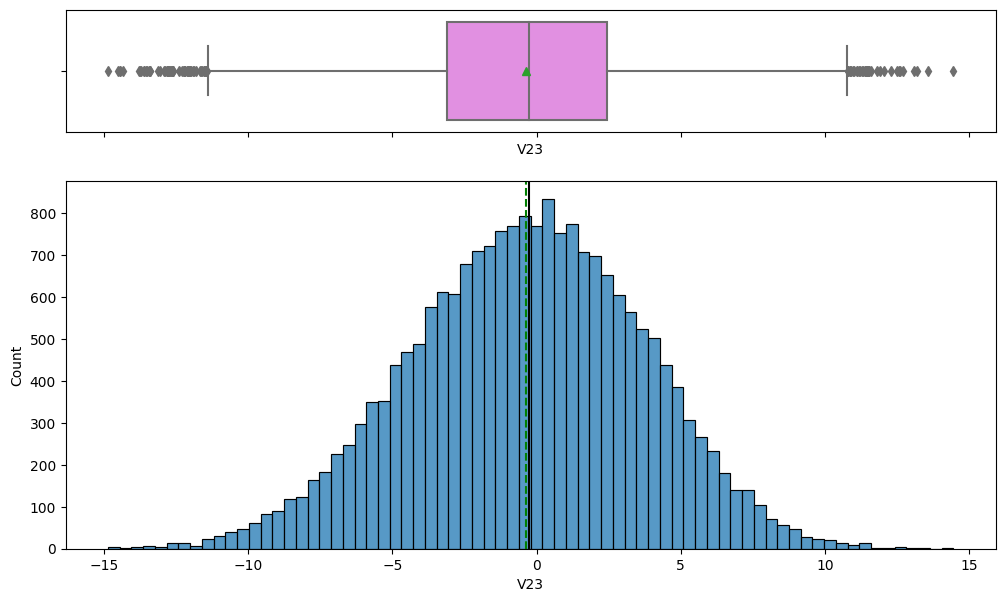

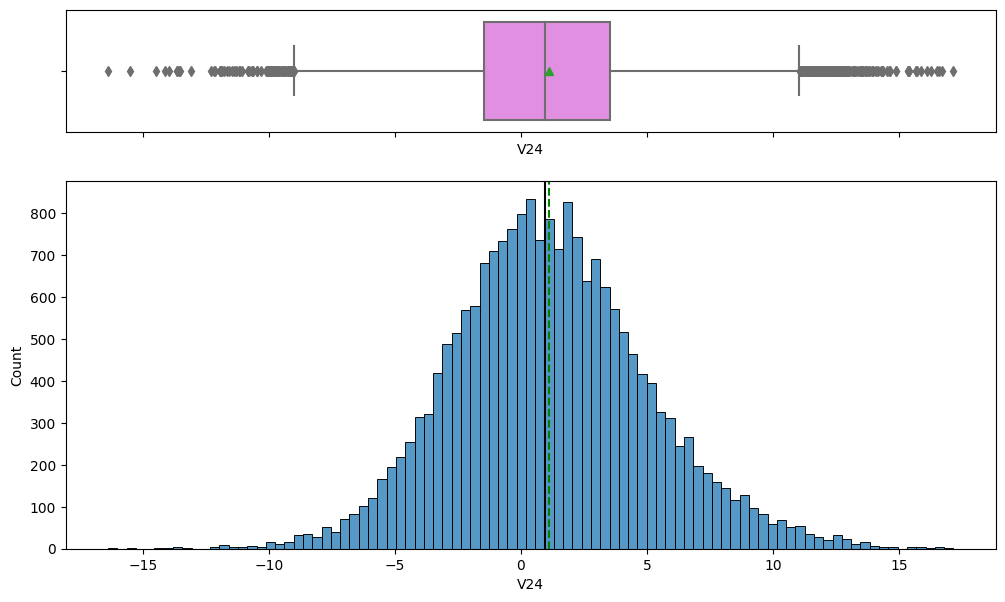

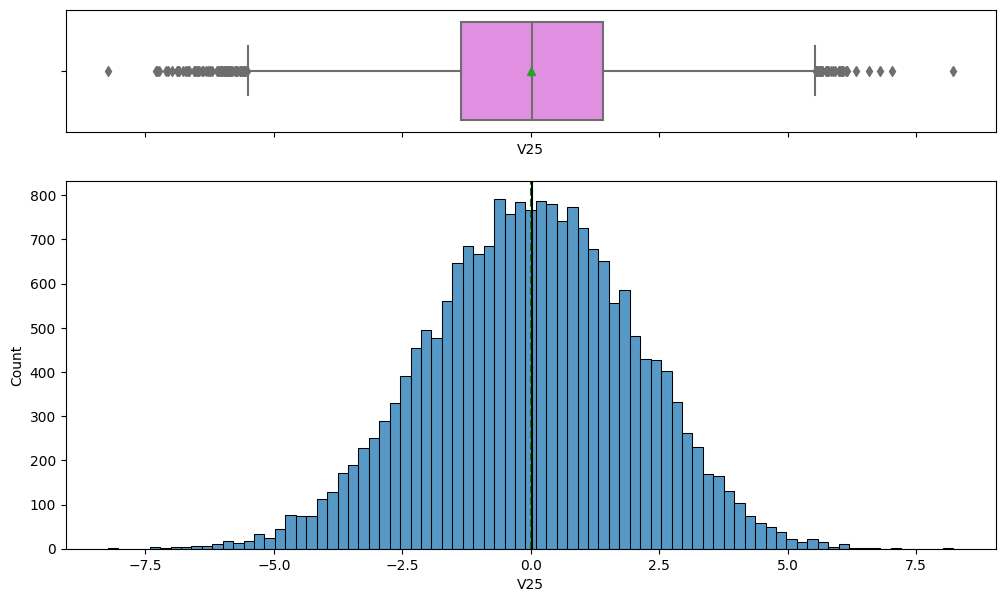

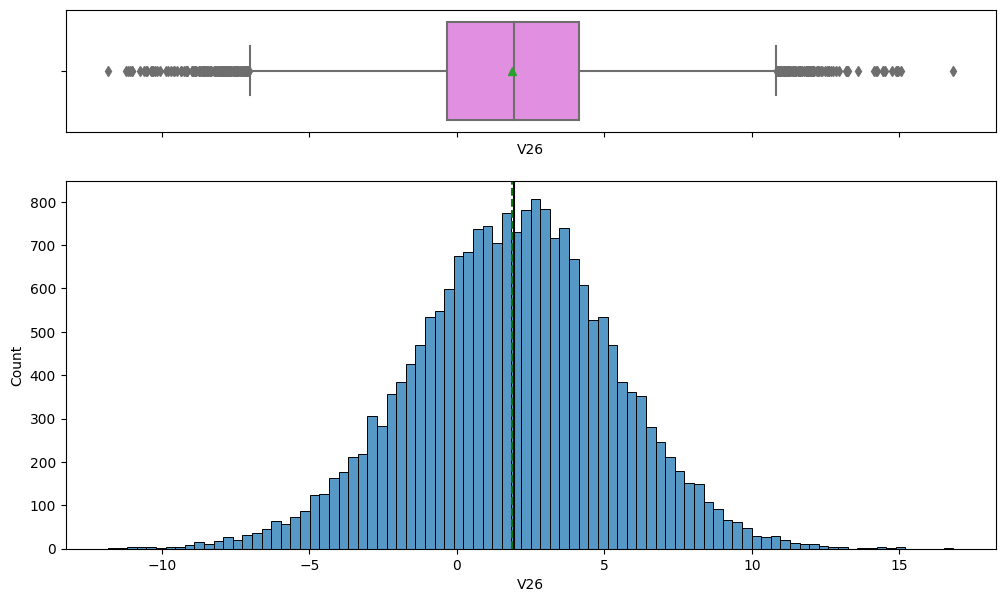

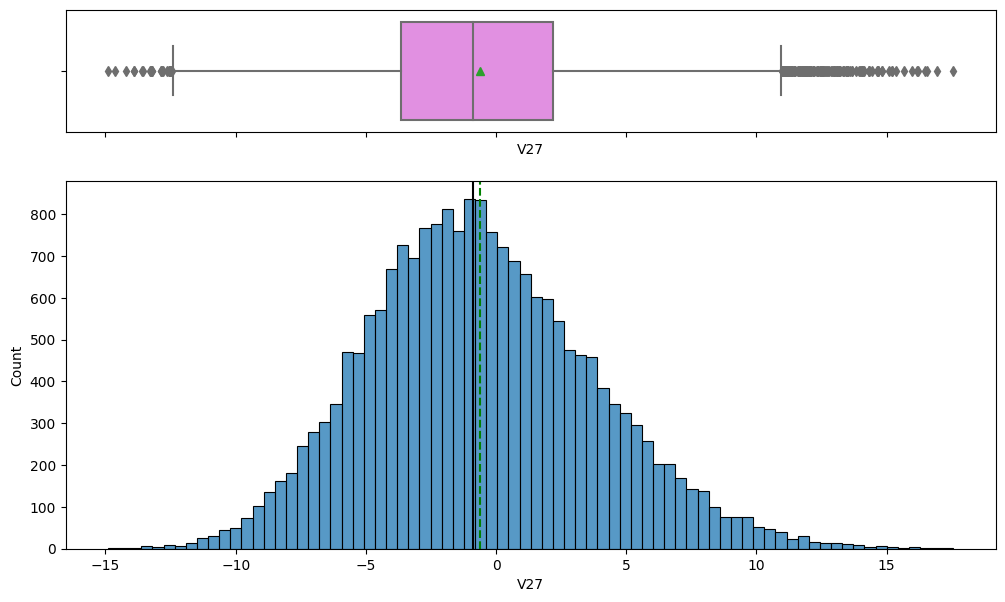

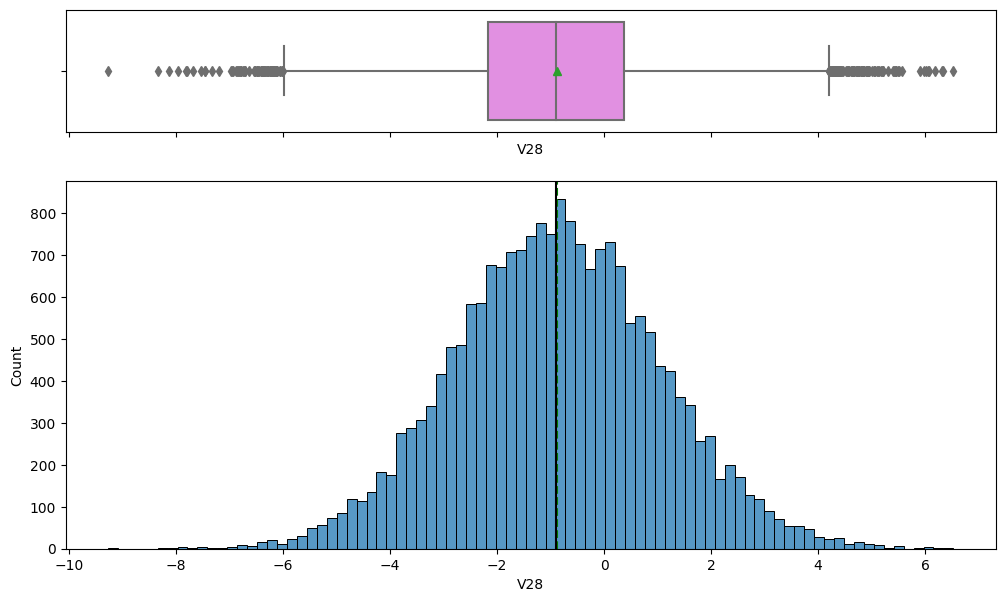

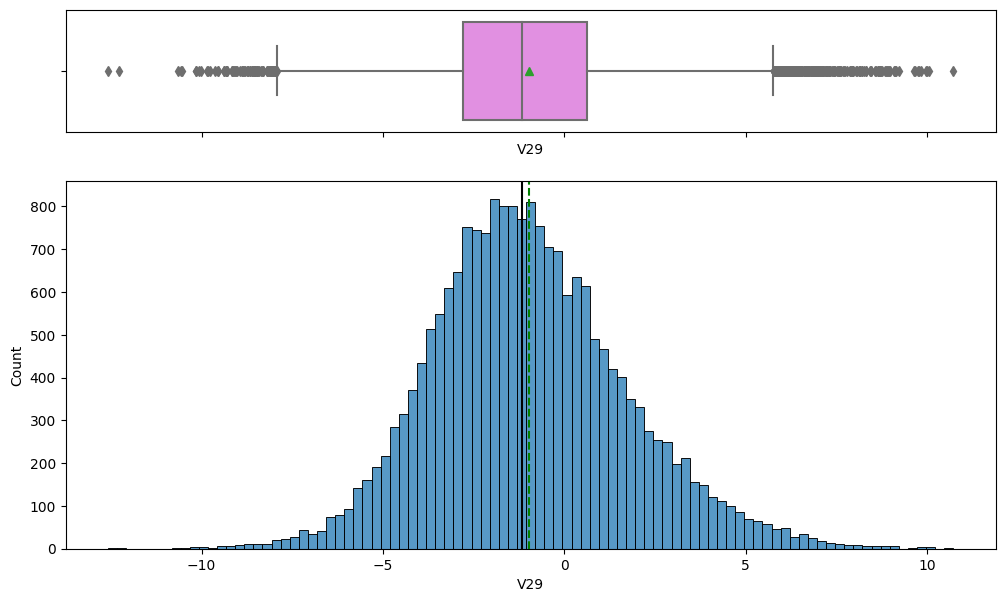

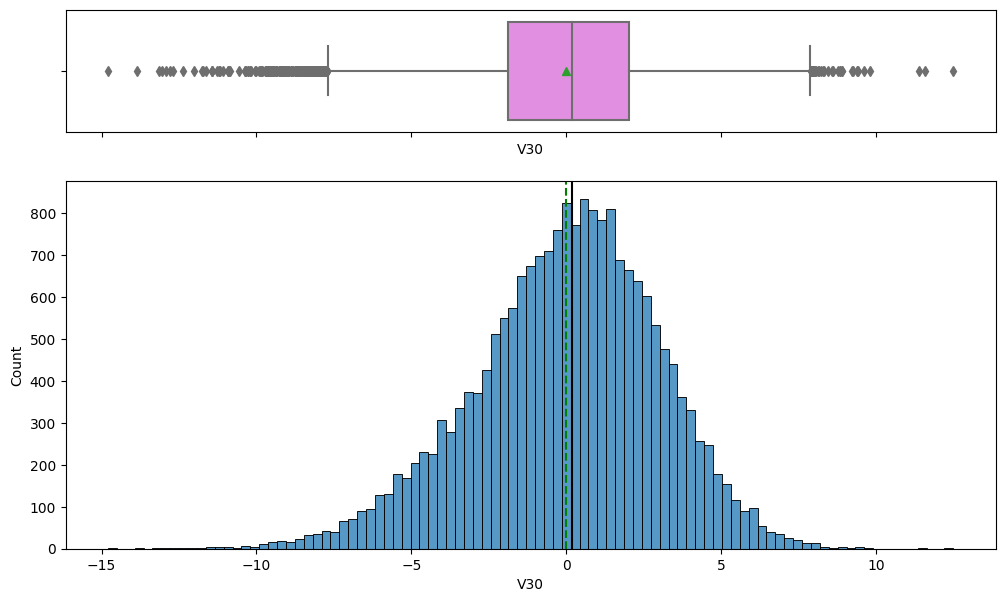

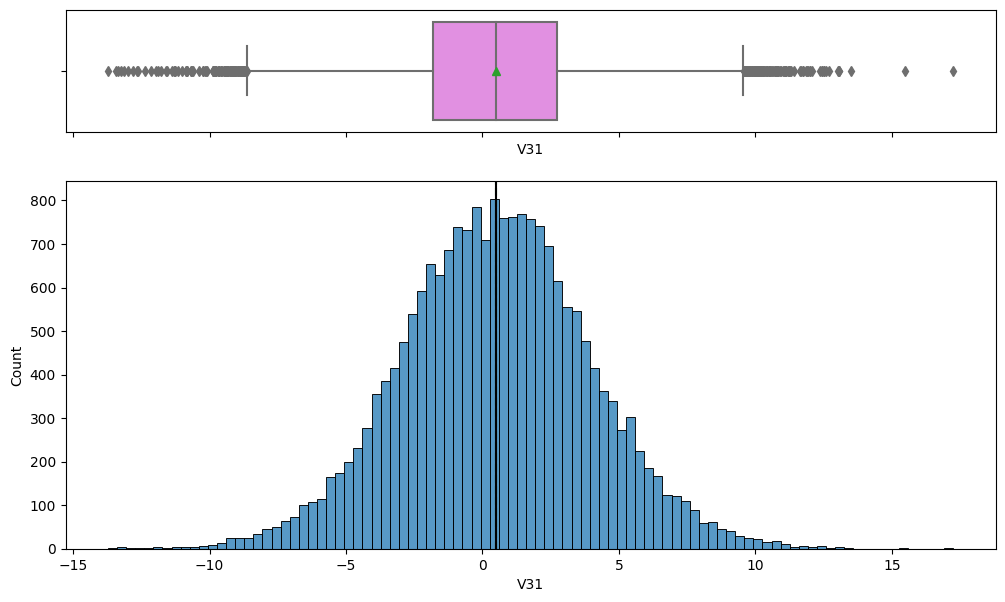

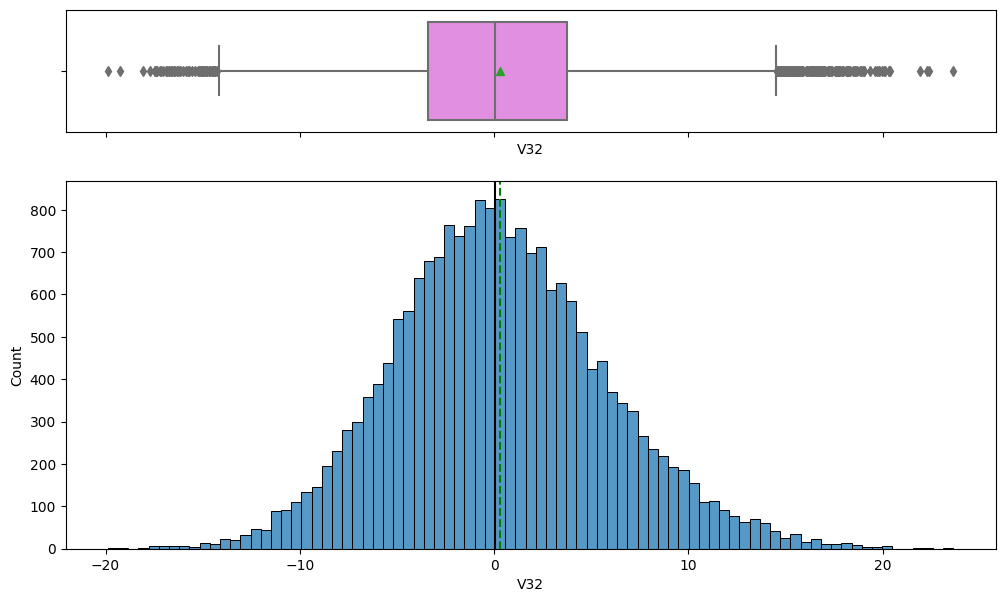

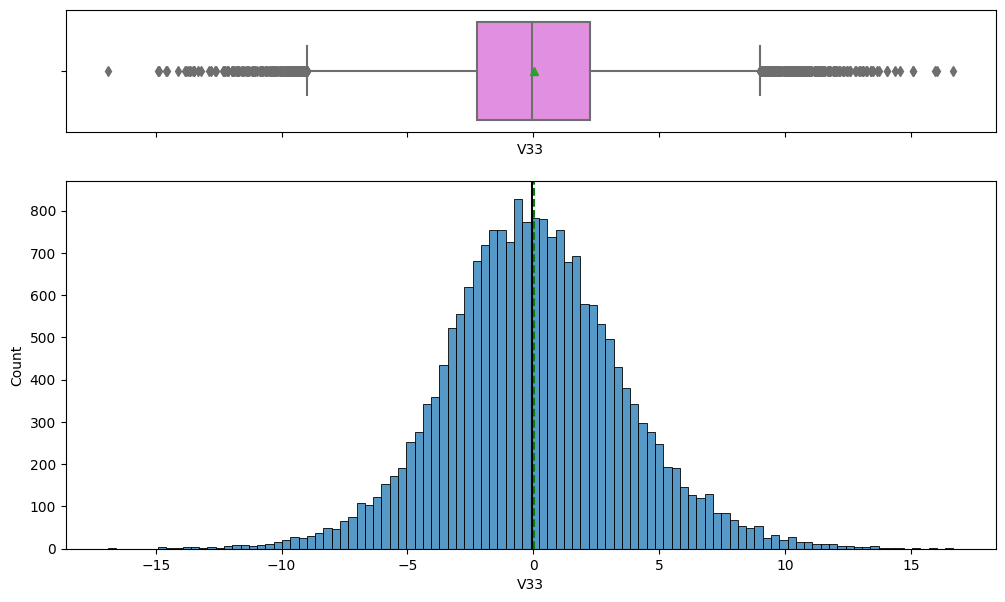

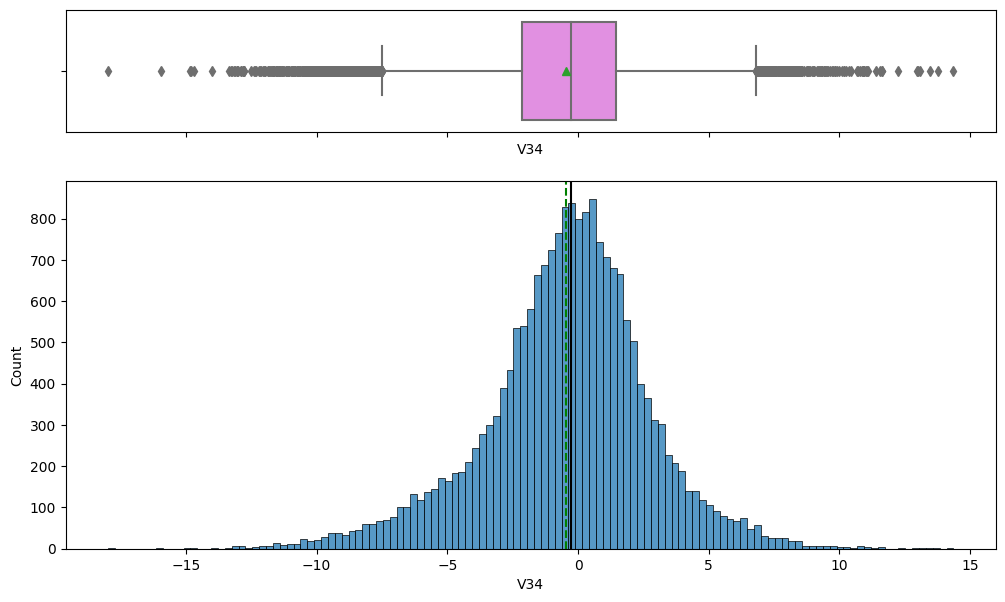

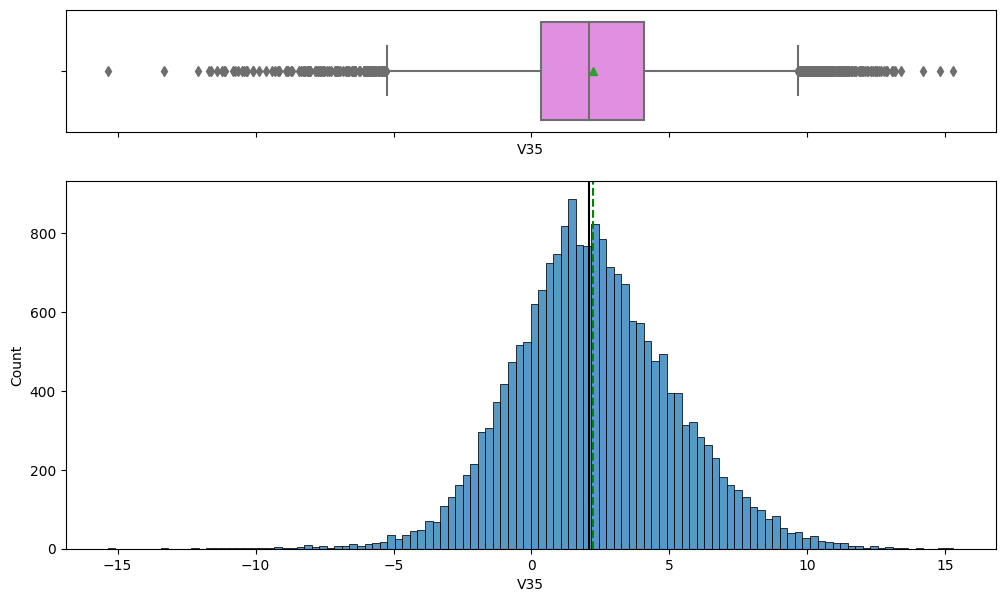

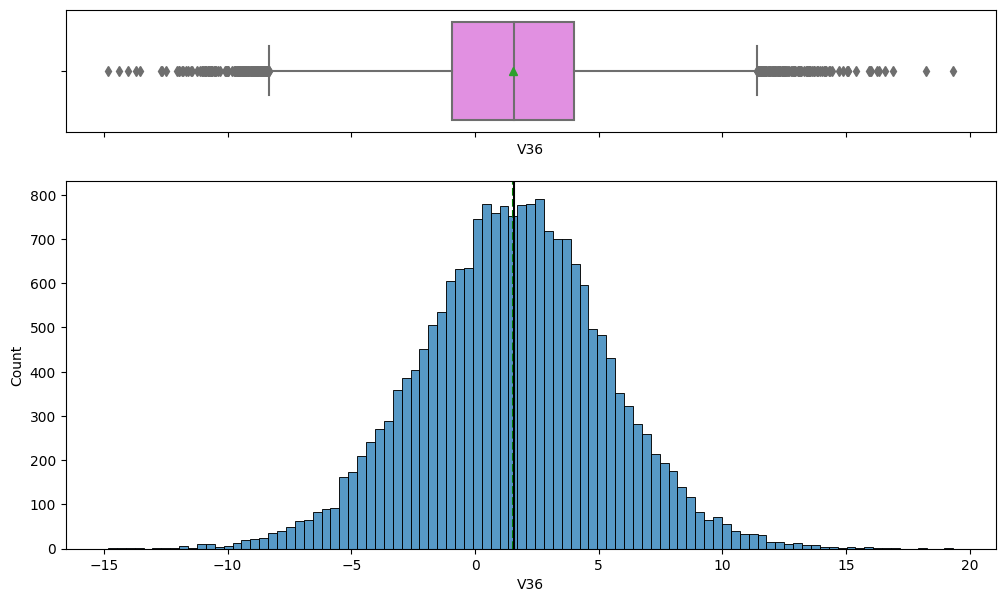

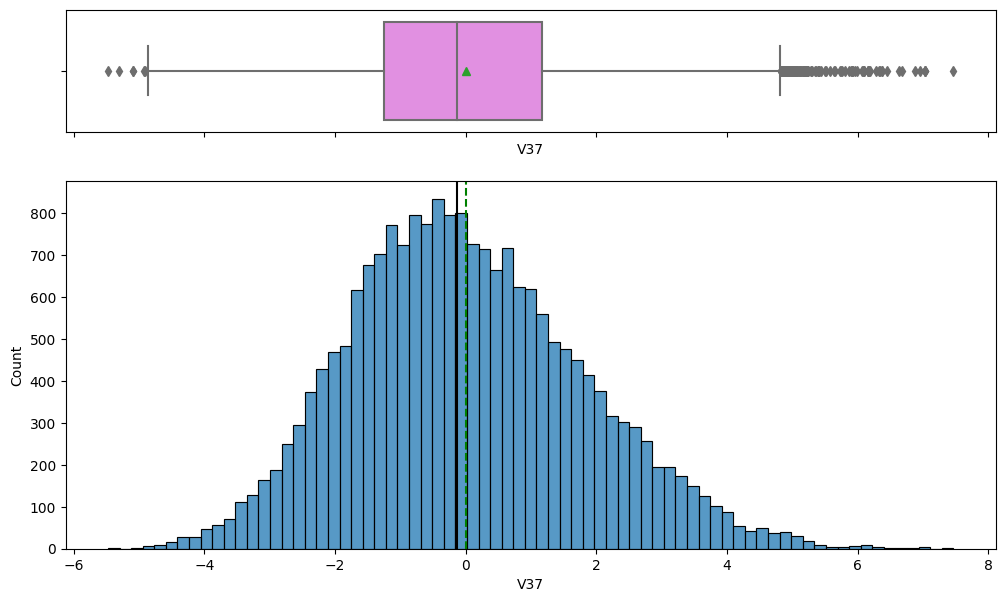

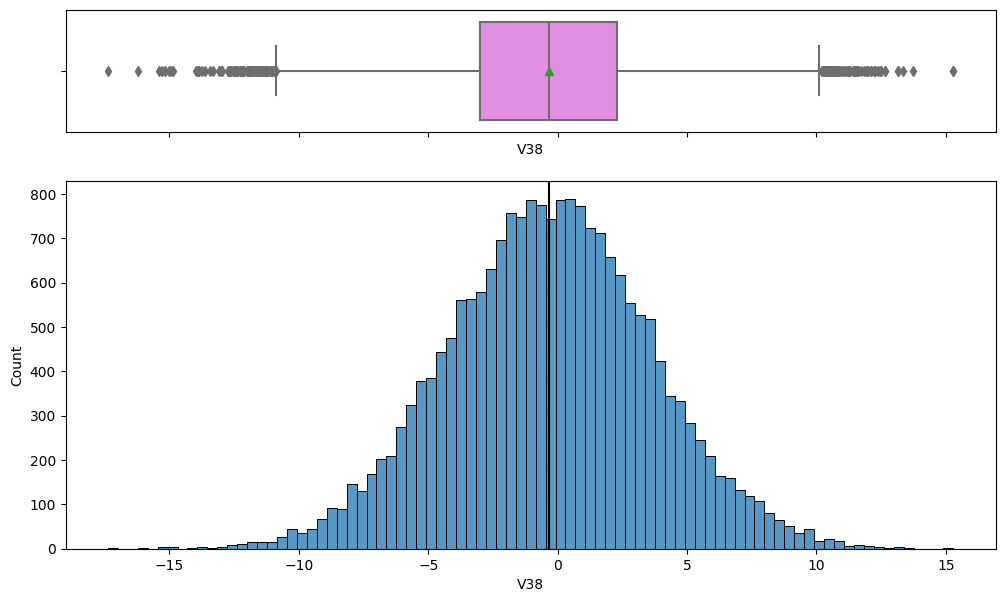

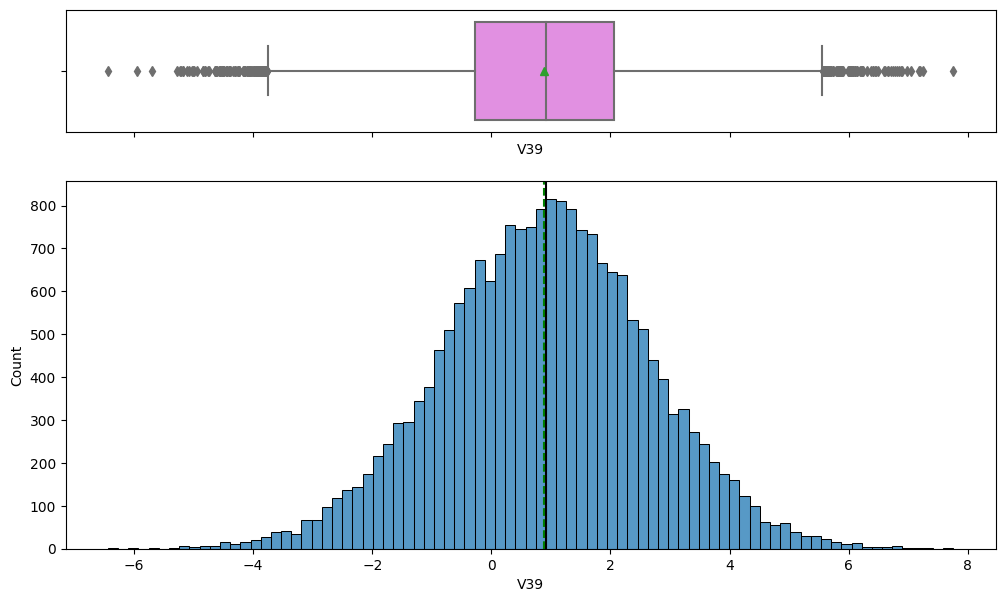

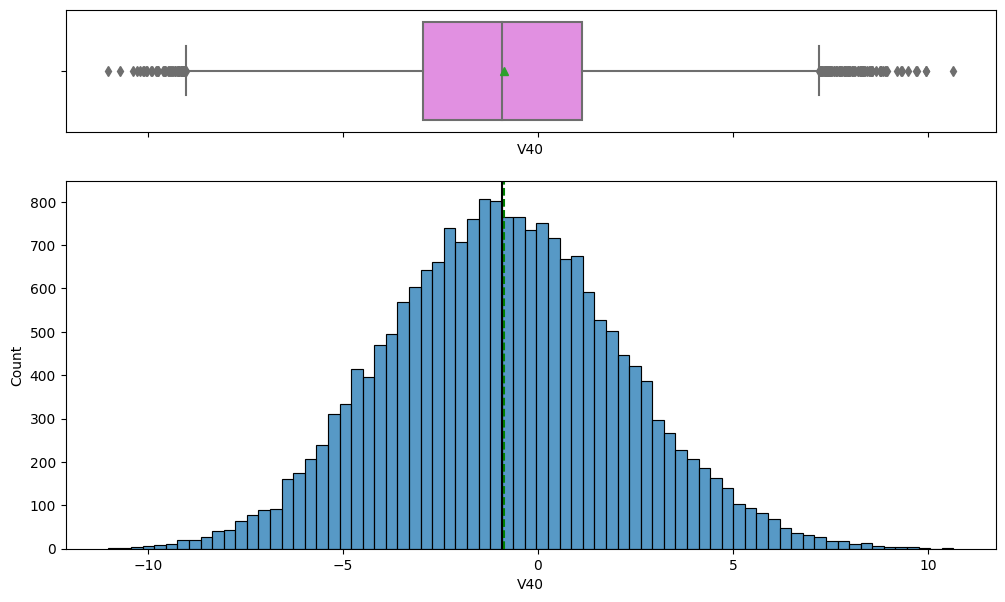

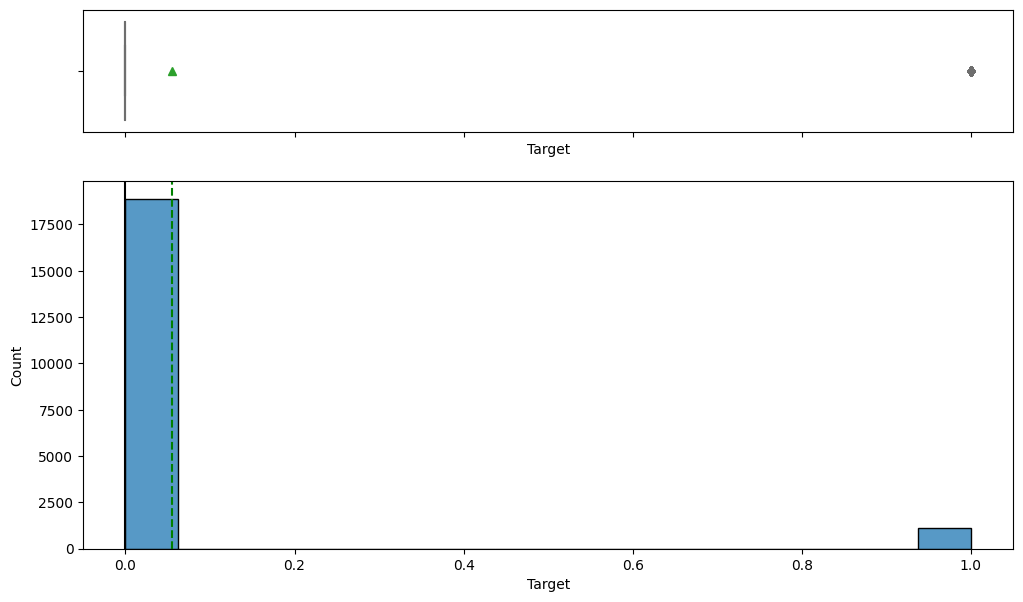

In [ ]:
for feature in data.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

**Observations**

*   The 'Target' variable has more than 18000 count of '0'(Not Failures) category compared to '1'(Failures) which constitutes to only 1000 records in the training dataset.
*   All the predictors, V1 to V40 has been normally distributed with some outliers on both sides of the distribution.



#### Correlation check

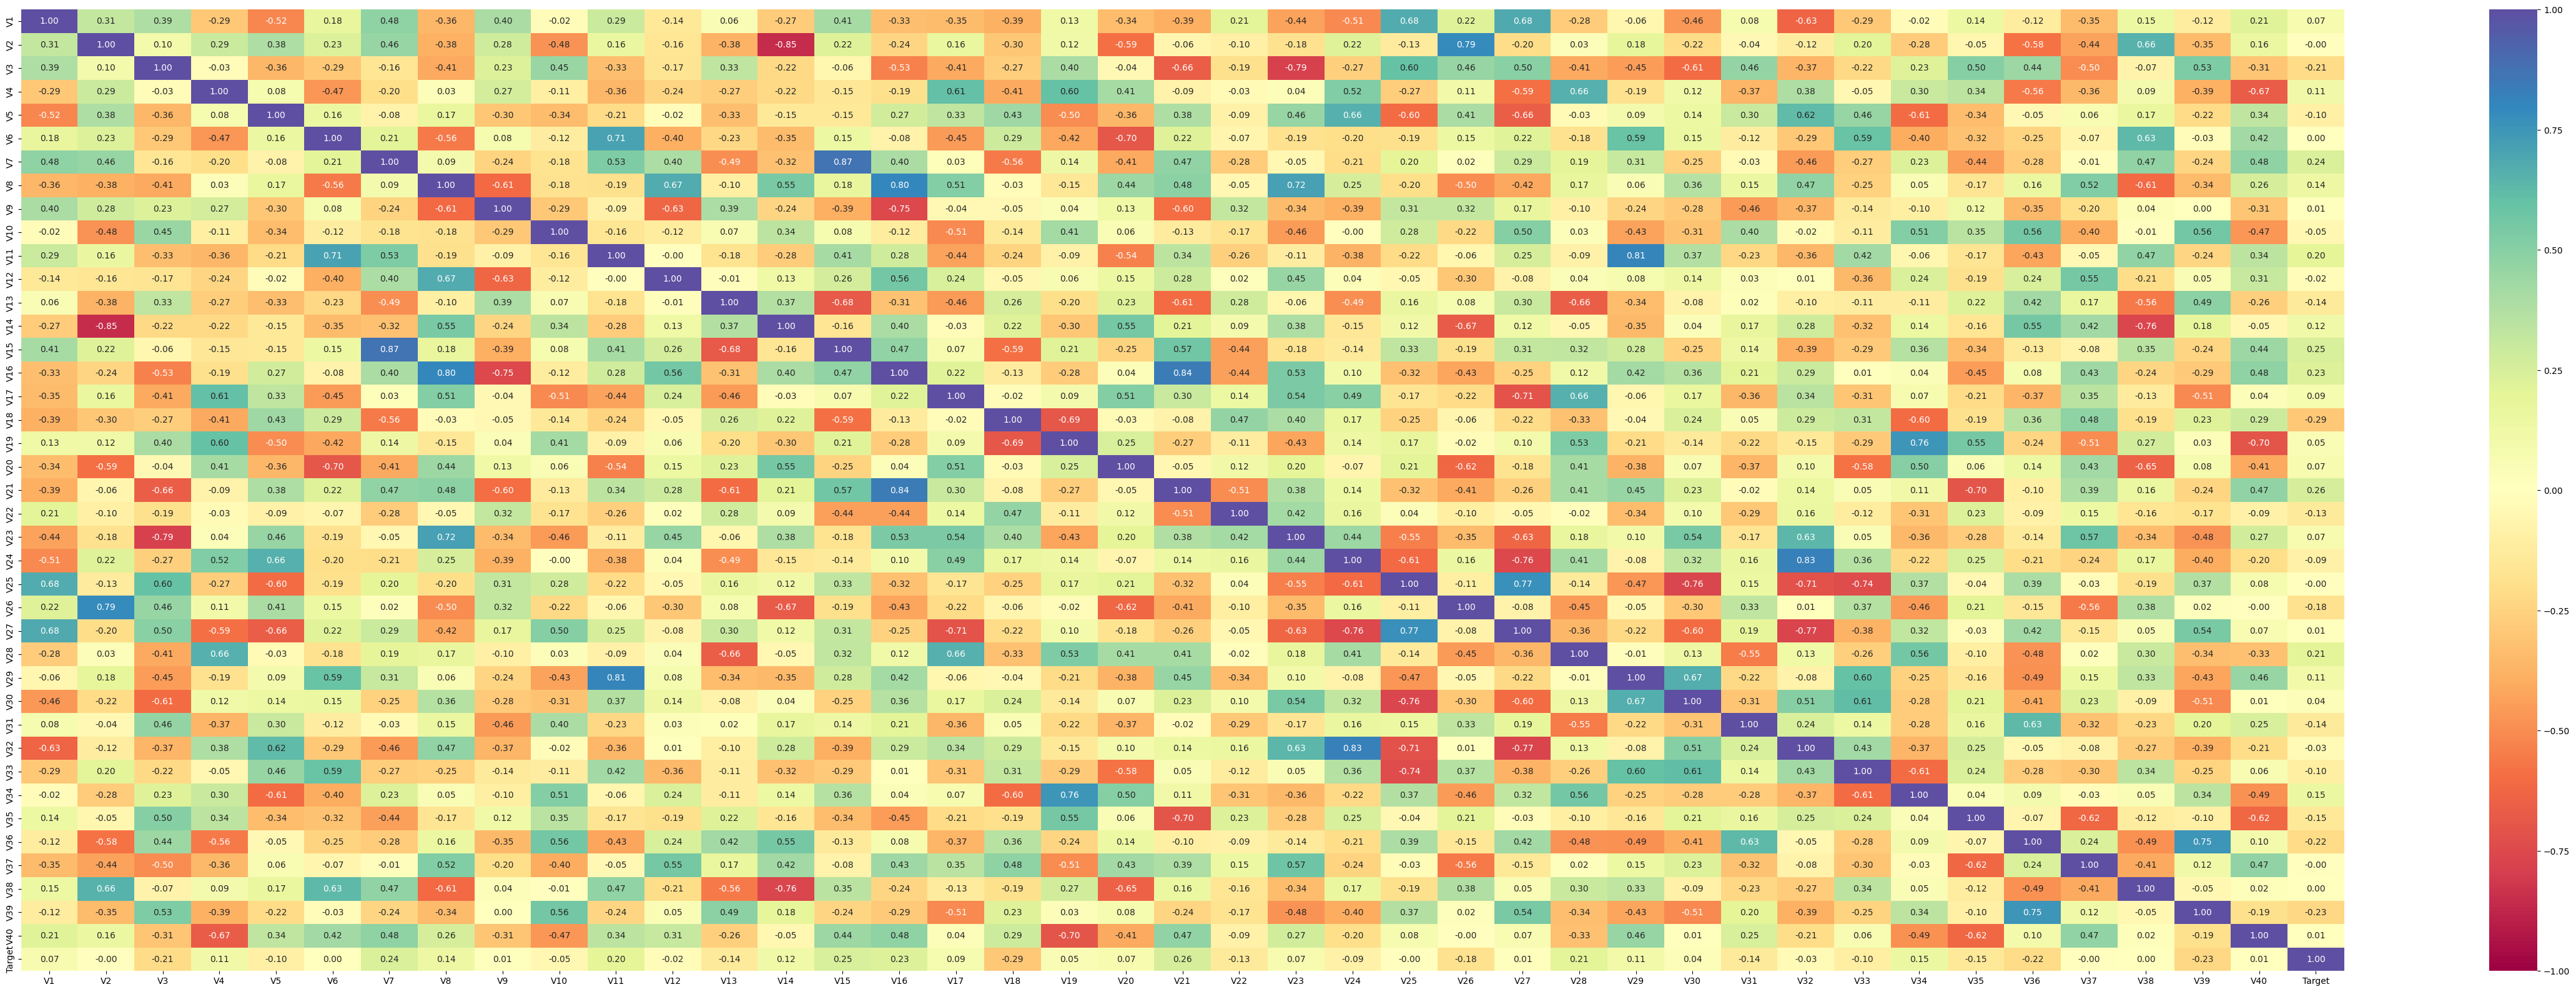

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(60, 20))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

*   The Predictors V7, V15 and V16 seem to have a slightly high positive correlation with the 'Target' variable.
*   The Predictors V3, V18, V36 and V38 have a slightly high negative correlation with the 'Target' variable.
*   None of the Predictors seem to have a very high correlation with the 'Target' variable.
*   There are many predictors who has high positive and negative correlation between them. Hence there is a high chance of multicollinearity situation.





## Data Pre-processing

Lets split the training data into Train and validation set. Since the test data is provided we will handle it seperately.

In [ ]:
# Seperating Target variable from X on the train data
X = data.drop(["Target"], axis=1)
y = data["Target"]

In [ ]:
# Splitting training dataset into train and validation set:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [ ]:
# Checking the number of rows in the train and validation set
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])

Number of rows in train data = 15000
Number of rows in validation data = 5000


In [ ]:
# Seperating Target variable from X on the test data
X_test = data_test.drop(["Target"], axis=1)
y_test = data_test["Target"]

In [ ]:
# Checking the number of rows in the test set
print("Number of rows in test data =", X_test.shape[0])


Number of rows in test data = 5000


In [ ]:
# view the number of rows and columns in train, validation and test set
print(X_train.shape, X_val.shape, X_test.shape)

(15000, 40) (5000, 40) (5000, 40)


## Missing value imputation




In [ ]:
# creating an object of the imputer
imputer = SimpleImputer(strategy="median")

In [ ]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [ ]:
# Checking that no column has missing values in train,validation and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

The missing values in the columns V1 and V2 has been imputed with the median value of the columns using SimpleImputer.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

**Let's start by building different models using KFold and cross_val_score and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [ ]:
%%time

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.4927566553639709
dtree: 0.6982829521679532
Bagging: 0.7210807301060529
Random forest: 0.7235192266070268
GBM: 0.7066661857008874
Adaboost: 0.6309140754635308
Xgboost: 0.8100497799581561

Validation Performance:

Logistic regression: 0.48201438848920863
dtree: 0.7050359712230215
Bagging: 0.7302158273381295
Random forest: 0.7266187050359713
GBM: 0.7230215827338129
Adaboost: 0.6762589928057554
Xgboost: 0.8309352517985612
CPU times: user 5min 21s, sys: 905 ms, total: 5min 22s
Wall time: 5min 18s


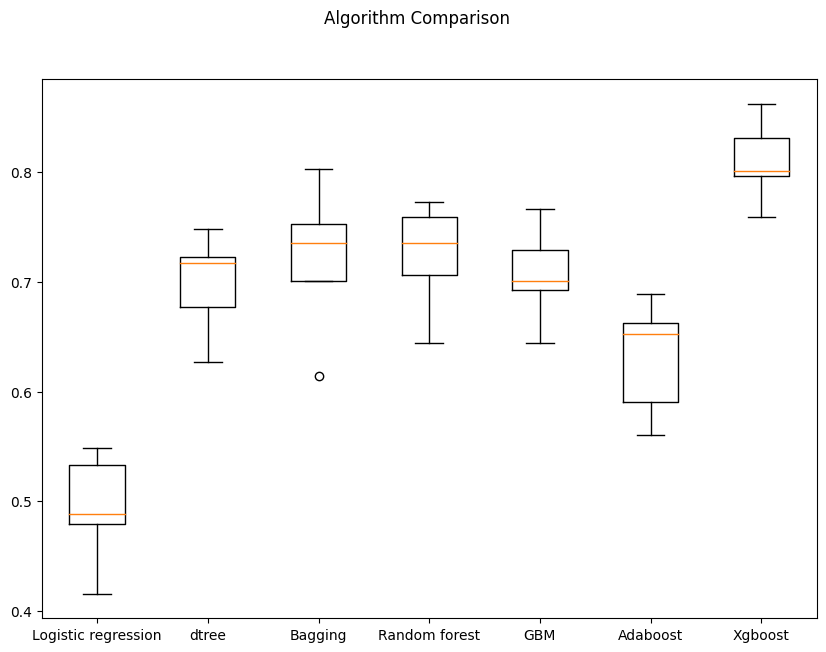

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**Observations**

*   It is observed from the above result that XGBoost classifier algorithm is giving the highest cross-validated recall followed by Random Forest classifier, Bagging and GBM algorithms.
*   The Logistic regression algorithm is giving a very poor recall.

Lets see if the performance improves if we do oversampling and undersampling.

### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 832
Before OverSampling, counts of label '0': 14168 

After OverSampling, counts of label '1': 14168
After OverSampling, counts of label '0': 14168 

After OverSampling, the shape of train_X: (28336, 40)
After OverSampling, the shape of train_y: (28336,) 



After applying the SMOTE method, the train data is oversampled in the ratio of 1:1. Lets build the models using oversampled data.

In [ ]:
%%time

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.883963699328486
dtree: 0.9720494245534969
Bagging: 0.9762141471581656
Random forest: 0.9839075260047615
GBM: 0.9256068151319724
Adaboost: 0.8978689011775473
Xgboost: 0.9891305241357218

Validation Performance:

Logistic regression: 0.8489208633093526
dtree: 0.7769784172661871
Bagging: 0.8345323741007195
Random forest: 0.8489208633093526
GBM: 0.8776978417266187
Adaboost: 0.8561151079136691
Xgboost: 0.8669064748201439
CPU times: user 9min 4s, sys: 1.59 s, total: 9min 5s
Wall time: 8min 57s


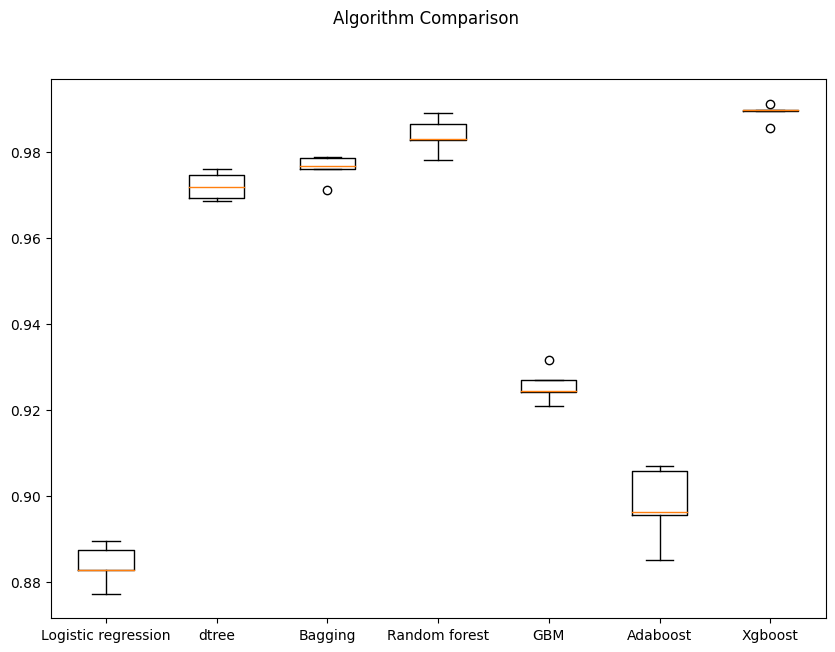

In [ ]:
# Plotting boxplots for CV scores of all models defined above using oversampled data
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**Observations**

*   The cross-validated recall score is highest for XGBoost classifier algorithm followed by Random Forest classifier algorithm, Bagging and Decision tree in the training data. However the recall score of the XGBoost classifier algorithm got very low to a difference of 12% compared to the training data in the validation set. Hence the XGBoost Classifier algorithm is overfitting.
*   The Random Forest, Bagging and Decision tree algorithm are also overfitting the training data.
*   The GBM and AdaBoost classifier algorithms are performing well on both training and validation set. The difference in the recall score between the training and validation set is around 5%. It is relatively not a huge overfit when compared to the bagging, Random Forest and Decision Tree algorithms.
*   The Logistic regression algorithm is performing well on the training and validation set. The difference in the recall score between the training and validation set is around 4% Hence it is somewhat generalizing well on the validation set.
*   The XGBoost classifier algorithm has a difference in percentage recall score of 11% between the training and validation set. However it is low compared to Decision tree, Random Forest and Bagging algorithm.

Hence the Logistic regression, AdaBoost, GBM and XGBoost classifier algorithms can be considered as best performing from the oversampled data.





### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 832
Before UnderSampling, counts of label '0': 14168 

After UnderSampling, counts of label '1': 832
After UnderSampling, counts of label '0': 832 

After UnderSampling, the shape of train_X: (1664, 40)
After UnderSampling, the shape of train_y: (1664,) 



After applying the RandomUndersampler method, the train data is undersampled in the ratio of 1:1. Lets build the models using undersampled data.

In [ ]:
%%time

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.8726138085275232
dtree: 0.8617776495202367
Bagging: 0.8641945025611427
Random forest: 0.9038669648654498
GBM: 0.8990621167303946
Adaboost: 0.8666113556020489
Xgboost: 0.9014717552846114

Validation Performance:

Logistic regression: 0.8525179856115108
dtree: 0.841726618705036
Bagging: 0.8705035971223022
Random forest: 0.8920863309352518
GBM: 0.8884892086330936
Adaboost: 0.8489208633093526
Xgboost: 0.89568345323741
CPU times: user 31.2 s, sys: 327 ms, total: 31.6 s
Wall time: 29.3 s


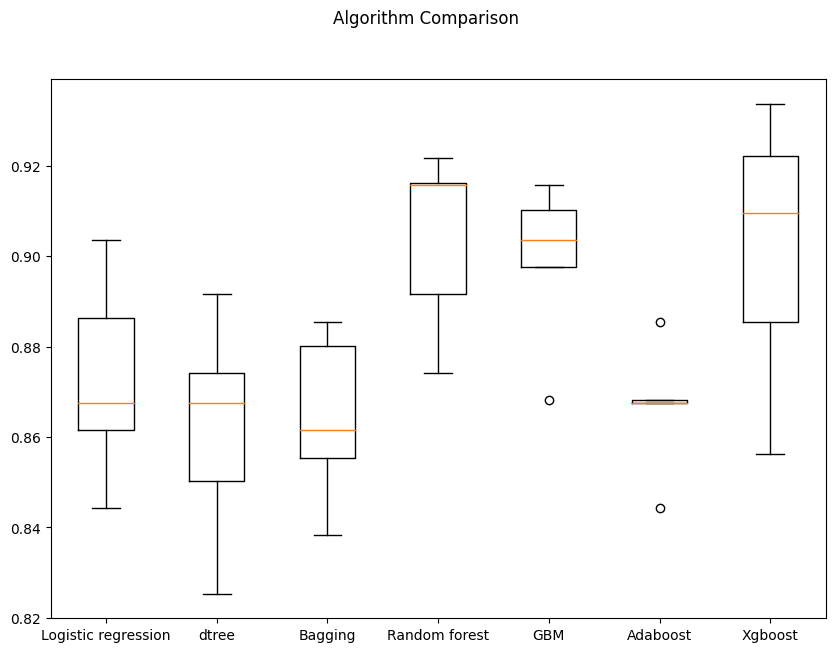

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**Observations**

*   The cross-validated recall score is highest for XGBoost classifier algorithm followed by Random Forest, GBM and Logistic regression algoritm in the training data.
*   There is a 2% difference in the recall performance of the Logisitc regression, Decision tree and AdaBoost classifier algorithms between the training and validation set. Hence these algorithms are generalizing well on the validation set.
*   The XGBoost, Random Forest and GBM algorithms performs really well on the validation set and the difference in the recall scores between the training and validation set is less than 1%.
*   The Bagging algorithm also performs well on both the training and validation dataset.

On the whole, the XGBoost, Random Forest, GBM algorithms can be considered as best performing on the undersampled data.





## HyperparameterTuning


*   The algorithms performing and generalizing well on the Oversampled data is GBM, AdaBoost, Logistic regression and XGBoost.
*   The algorithms peforming and generalizing well on the undersampled data is Random Forest, GBM and XGBoost classifier.
*   Lets hypertune the GBM, AdaBoost and XGBoost algorithms on the oversampled data and also hypertune the Random Forest classifier algorithm on the undersampled data and check the results.
*   The reason for hypertuning three algorithms on oversampled data is to evaluate how well the algorithmns perform on a larger dataset. Since the Random Forest classifier algorithm is performing well on the undersampled data lets try to optimize the performance and check the results.


### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Hyperparameter tuning - AdaBoost with Oversampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV

param_grid = { "n_estimators": [100, 150, 200],
               "learning_rate": [0.2, 0.05],
               "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1),
                                  DecisionTreeClassifier(max_depth=3, random_state=1), ] }


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV using oversampled data
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9714853746337214:
CPU times: user 2min 27s, sys: 5.71 s, total: 2min 33s
Wall time: 59min 5s


In [ ]:
# building AdaBoost model with best parameters
ada_tuned = AdaBoostClassifier(
    n_estimators=200, learning_rate=0.2, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
)

# Fit the model on training data
ada_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200)

In [ ]:
# Calculating different metrics on train set
ada_train_perf = model_performance_classification_sklearn(ada_tuned, X_train_over, y_train_over)
ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.992,0.988,0.995,0.992


In [ ]:
# Calculating different metrics on Validation set
ada_val_perf = model_performance_classification_sklearn(ada_tuned, X_val, y_val)
ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.979,0.853,0.790,0.820


**Observations**

The validation recall score of the hyperparameter tuned AdaBoost classifier with oversampled data is 0.85. However there is a difference of over 14% between the training and validation set. Hence the AdaBoost classifier tuned model is not generalizing well.Also the tuning takes about 1 hour to complete execution.

### Hyperparameter tuning - Random Forest classifier algorithm with undersampled data

In [ ]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 2, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.8990116153235697:
CPU times: user 3.36 s, sys: 265 ms, total: 3.62 s
Wall time: 2min 4s


In [ ]:
# building Random Forest Classifer model with best parameters
rf2_tuned = RandomForestClassifier(
    max_features='sqrt',
    random_state=1,
    max_samples=0.5,
    n_estimators=300,
    min_samples_leaf=2,
)

# Fit the model on training data
rf2_tuned.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.5, min_samples_leaf=2, n_estimators=300,
                       random_state=1)

In [ ]:
# Calculating different metrics on train set
rf2_train_perf = model_performance_classification_sklearn(rf2_tuned, X_train_un, y_train_un)
rf2_train_perf

,Accuracy,Recall,Precision,F1
0,0.961,0.933,0.989,0.960


In [ ]:
# Calculating different metrics on validation set
rf2_val_perf = model_performance_classification_sklearn(rf2_tuned, X_val, y_val)
rf2_val_perf

,Accuracy,Recall,Precision,F1
0,0.938,0.885,0.468,0.612


**Observations**

The validation recall score of the Random Forest classifier model tuned with undersampled data is 0.88 which is really good and the difference in the percentage of recall score between the training and validation set is only 5%. Hence the model is generalizing well on the validation set. However the precision score of the validation set id very low for Random Forest classifer tuned model.

### Hyperparameter tuning - Gradient Boosting with oversampled data

In [ ]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9723322092856124:
CPU times: user 38.7 s, sys: 2.69 s, total: 41.4 s
Wall time: 28min


In [ ]:
# building Gradient Boosting model with best parameters
gbm_tuned = GradientBoostingClassifier(
    max_features=0.5,
    random_state=1,
    learning_rate=1,
    n_estimators=125,
    subsample=0.7,
)

# Fit the model on training data
gbm_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           random_state=1, subsample=0.7)

In [ ]:
# Calculating different metrics on train set
gbm_train_perf = model_performance_classification_sklearn(gbm_tuned, X_train_over, y_train_over)
gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.993,0.992,0.994,0.993


In [ ]:
# Calculating different metrics on validation set
gbm_val_perf = model_performance_classification_sklearn(gbm_tuned, X_val, y_val)
gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.969,0.856,0.678,0.757


**Observations**

The validation recall score of the Gradient Boosting algorithm tuned with oversampled data is 0.85. However the difference in percentage of recall score between the training and validation set is over 15% which is very high. Also the tuning takes about 30 minutes to execute.

### Hyperparameter tuning - XGBoost with Oversampled data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.9960475154078072:
CPU times: user 10.6 s, sys: 972 ms, total: 11.6 s
Wall time: 8min 50s


In [ ]:
# building XGBoost model with best parameters
xgb2_tuned = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=150,
    learning_rate=0.1,
    gamma=0,
)

xgb2_tuned.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Calculating different metrics on train set
xgb2_train_perf =  model_performance_classification_sklearn(xgb2_tuned, X_train_over, y_train_over)
xgb2_train_perf

,Accuracy,Recall,Precision,F1
0,0.994,1.000,0.988,0.994


In [ ]:
# Calculating different metrics on validation set
xgb2_val_perf =  model_performance_classification_sklearn(xgb2_tuned, X_val, y_val)
xgb2_val_perf

,Accuracy,Recall,Precision,F1
0,0.967,0.892,0.648,0.750


**Observations**

The validation recall score of the tuned XGBoost classifier model with oversampled data is 0.89 which is higher than all the other algorithms evaluated so far. The difference in percentage of the recall score between the training and validation set is around 10% and the validation precision score is also good.

## Model performance comparison and choosing the final model

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        ada_train_perf.T,
        rf2_train_perf.T,
        gbm_train_perf.T,
        xgb2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost classifier tuned with oversampled data",
    "Random forest tuned with undersampled data",
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost classifier tuned with oversampled data,Random forest tuned with undersampled data,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data
Accuracy,0.992,0.961,0.993,0.994
Recall,0.988,0.933,0.992,1.000
Precision,0.995,0.989,0.994,0.988
F1,0.992,0.960,0.993,0.994


In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        ada_val_perf.T,
        rf2_val_perf.T,
        gbm_val_perf.T,
        xgb2_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "AdaBoost classifier tuned with oversampled data",
    "Random forest tuned with undersampled data",
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,AdaBoost classifier tuned with oversampled data,Random forest tuned with undersampled data,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data
Accuracy,0.979,0.938,0.969,0.967
Recall,0.853,0.885,0.856,0.892
Precision,0.790,0.468,0.678,0.648
F1,0.820,0.612,0.757,0.750


**Observations**

*   The XGBoost classifier model tuned with oversampled data using Random searchCV is giving the best validation recall of 0.89 followed by Random Forest classifier model tuned with undersampled data and using Random search cross-validation giving a recall score of 0.885. The Random Forest classifier tuned with undersampled data has low precision score in the validation set. On the otherhand the XGBoost classifier model tuned with oversampled data has much higher precision score in the validation set.
*   The difference in percentage of recall score between the training and validation set for AdaBoost and GBM tuned with overssampled data is 14%. However for the XGBoost classifier tuned with oversampled data has a percentage difference in recall score of only 10% which is comparitively low.
*   Though the Random Forest classifier tuned with undersampled data is having a much lower difference in percentage of recall score of 5% between the training and validation set, the validation precision score is way too low.
*   Though the validation precision score of the tuned AdaBoost classifier model is high when compared to other models, our point of interest for this ReneWind problem is optimizing the recall score. The hyperparameter tuning of Adaboost and GBM with oversampled data takes way too high time of 55 minutes. The XGBoost classifier with oversampled data takes only 8 minutes for hyperparameter tuning.


Hence we can consider the XGBoost classifier model for further evaluation on the test set to check the performance and see the feature importances as well.


### Test set final performance

Let's check the XGBoost classifier model tuned with oversampled data performance on the test set.

In [ ]:
# Calculating different metrics on the test set
xgb2_test_perf = model_performance_classification_sklearn(xgb2_tuned, X_test, y_test)
print("XGBoost classifier with Oversampled data - Test performance:")
xgb2_test_perf

XGBoost classifier with Oversampled data - Test performance:


,Accuracy,Recall,Precision,F1
0,0.966,0.858,0.649,0.739


**Observations**

The performance metrics of XGBoost classifier tuned with oversampled data on the test dataset is generalised with the validation set results.
Let's check the important features for prediction as per the the XGBoost classifier tuned model.

### Feature Importances

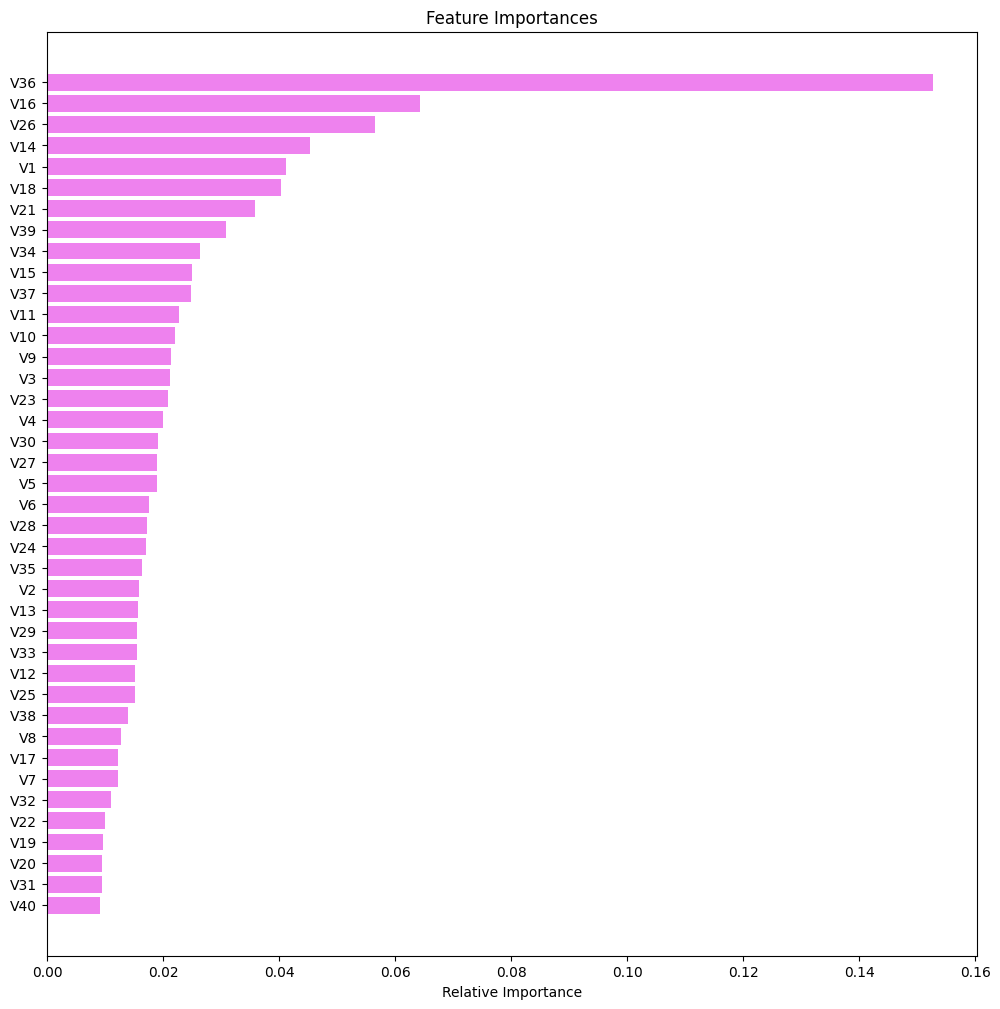

In [ ]:
feature_names = X_train.columns
importances =  xgb2_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

*   The predictor, V36 takes the highest priority in predicting the component failure.
*   The Predictors, V16, V26 and V14 takes the second, third and fourth priority by the XGBoost classifier algorithm.



## Pipelines to build the final model


Now that we have a final model, let's use pipelines to put the model into production. We can use pipelines to standardize the model building.

There is only numerical data in the dataset. Hence we don't need to use column transformer.

In [ ]:
# Creating Pipeline with best parameters
Pipeline_model = Pipeline(
    steps=[
        ("XGB",XGBClassifier
         (random_state=1,
          eval_metric="logloss",
          subsample=0.9,
          scale_pos_weight=10,
          n_estimators=150,
          learning_rate=0.1,
          gamma=0
        ),
        ),
    ]
)

In [ ]:
# Separating target variable and other variables in the train set
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# Separating target variable and other variables in the test set

X_test1 = data_test.drop(columns="Target")
y_test1 = data_test["Target"]

In [ ]:
# treat the missing values in the train set with SimpleImputer
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y1 == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y1 == 0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_over1 == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_over1 == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_over1.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_over1.shape))

Before OverSampling, counts of label '1': 1110
Before OverSampling, counts of label '0': 18890 

After OverSampling, counts of label '1': 18890
After OverSampling, counts of label '0': 18890 

After OverSampling, the shape of train_X: (37780, 40)
After OverSampling, the shape of train_y: (37780,) 



After applying the SMOTE method, the train data is oversampled in the ratio of 1:1. Lets build the models using oversampled data.

In [ ]:
# Fit the model on oversampled training data
Pipeline_model.fit(X_over1, y_over1)

Pipeline(steps=[('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

In [ ]:
# check the pipeline model performance on test set
Pipeline_model_test = model_performance_classification_sklearn(Pipeline_model, X_test1, y_test1)
Pipeline_model_test

,Accuracy,Recall,Precision,F1
0,0.958,0.858,0.585,0.695


**Observations**

The final XGBoost classifer model built using pipeline with oversampled data is giving a good recall of 0.86. The precision is around 0.58 which is a little low. However the goal of optimizing the recall score is achieved. Overall the XGBoost classifier tuned model is performing well is reducing the False Negatives.

# Business Insights and Conclusions


*   The predictors V36 takes the highest priority in predicting the component failures of the generators followed by V16, V26 and V14 takes the second, third and fourth priority by the XGBoost classifier algorithm.
*   The Predictors V7, V15 and V16 seem to have a slightly high positive correlation with the 'Target' variable. The Predictors V3, V18, V36 and V38 have a slightly high negative correlation with the 'Target' variable.
*   None of the Predictors seem to have a very high correlation with the 'Target' variable.
*   The algorithms performing and generalizing well on the Oversampled data are GBM, AdaBoost, Logistic regression and XGBoost.
*   The algorithms peforming and generalizing well on the undersampled data are Random Forest, GBM and XGBoost classifier.
*   The performance metrics of XGBoost classifier tuned with oversampled data on the test dataset is generalised with the validation set results. The recall score of the XGBoost classifier tuned model in the test set/Production dataset is 0.86 which is really good as it significantly reduces the number of False Negatives thereby making sure of predicting the generator failures of the wind turbine more efficiently.
*   The ReneWind company can implement the XGBoost classifier tuned model which is optimizing the recall score significantly so that predictive maintenance can be done efficiently as the failure patterns can be predicted much accurately and the component is replaced before it fails which will reduce the costs of operation and maintenance.



